## Twitter Big Data Analysis

### Checking Spark Session

In [247]:
sc

<SparkContext master=local[*] appName=PySparkShell>

### Loading in the Data

In [248]:
twitter = "/user1/twitter_training.csv"

twitter_df = spark.read.csv(twitter, header='true', inferSchema='true')
twitter_df.createOrReplaceTempView("twitter")

In [249]:
twitter_df.printSchema()

root
 |-- 2401: integer (nullable = true)
 |-- Borderlands: string (nullable = true)
 |-- Positive: string (nullable = true)
 |-- im getting on borderlands and i will murder you all ,: string (nullable = true)



In [250]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [251]:
newSchema = StructType([\
                       StructField("tweet_ID", IntegerType(), True),
                       StructField("entity", StringType(), True),
                       StructField("sentiment", StringType(), True),
                       StructField("tweet_content", StringType(), True)
                       ])

In [252]:
twitter_df = spark.read.format("csv")\
    .schema (newSchema)\
    .option("inferSchema", "True")\
    .option("path", twitter)\
    .load()

In [253]:
twitter_df.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- tweet_content: string (nullable = true)



### EDA and Preprocessing

In [254]:
print('Count of rows: {0}'.format(twitter_df.count()))
print('Count of distinct rows: {0}'.format(twitter_df.distinct().count()))

Count of rows: 74682


Count of distinct rows: 71938


In [255]:
twitter_df_preprocessing = twitter_df.dropDuplicates()
twitter_df_preprocessing.show()

+--------+--------------------+----------+--------------------+
|tweet_ID|              entity| sentiment|       tweet_content|
+--------+--------------------+----------+--------------------+
|    2504|         Borderlands|  Positive|    IM SO FUCKING IN|
|    2600|         Borderlands|  Positive|I want to say tha...|
|    2716|         Borderlands|   Neutral|This would be an ...|
|    2729|         Borderlands|   Neutral|back on my dry bo...|
|    2741|         Borderlands|  Positive|been mad inactive...|
|    2763|         Borderlands|  Negative|Not to say that t...|
|    1614|CallOfDutyBlackop...|  Positive|This sounds like ...|
|    1638|CallOfDutyBlackop...|  Negative|Gonna fucking be ass|
|    1700|CallOfDutyBlackop...|Irrelevant|You can’t say thi...|
|    1715|CallOfDutyBlackop...|  Negative|I tried the new a...|
|    1765|CallOfDutyBlackop...|  Positive|sooo hyped for wh...|
|    1889|CallOfDutyBlackop...|Irrelevant|I give up... Too ...|
|    1913|CallOfDutyBlackop...|  Positiv

In [256]:
print('Count of rows: {0}'.format(twitter_df_preprocessing.count()))
print('Count of distinct rows: {0}'.format(twitter_df_preprocessing.distinct().count()))

Count of rows: 71938
Count of distinct rows: 71938


In [257]:
from pyspark.sql.functions import col, sum as spark_sum

In [258]:
# Counting missing values for each feature column
missing_values = twitter_df_preprocessing.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_df_preprocessing.columns))

# Displaying the missing value count
missing_values.show()

+--------+------+---------+-------------+
|tweet_ID|entity|sentiment|tweet_content|
+--------+------+---------+-------------+
|       0|     0|        0|          326|
+--------+------+---------+-------------+



In [259]:
# Dropping rows with missing values
twitter_df_preprocessing = twitter_df_preprocessing.dropna()

In [260]:
# Counting missing values for each feature column
missing_values = twitter_df_preprocessing.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_df_preprocessing.columns))

# Displaying the missing value count
missing_values.show()

+--------+------+---------+-------------+
|tweet_ID|entity|sentiment|tweet_content|
+--------+------+---------+-------------+
|       0|     0|        0|            0|
+--------+------+---------+-------------+



In [261]:
# Viewing the schema of the new DataFrame
twitter_df_preprocessing.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- tweet_content: string (nullable = true)



In [262]:
# Viewing first few rows of the filtered DataFrame
twitter_df_preprocessing.show()

+--------+--------------------+----------+--------------------+
|tweet_ID|              entity| sentiment|       tweet_content|
+--------+--------------------+----------+--------------------+
|    2504|         Borderlands|  Positive|    IM SO FUCKING IN|
|    2600|         Borderlands|  Positive|I want to say tha...|
|    2716|         Borderlands|   Neutral|This would be an ...|
|    2729|         Borderlands|   Neutral|back on my dry bo...|
|    2741|         Borderlands|  Positive|been mad inactive...|
|    2763|         Borderlands|  Negative|Not to say that t...|
|    1614|CallOfDutyBlackop...|  Positive|This sounds like ...|
|    1638|CallOfDutyBlackop...|  Negative|Gonna fucking be ass|
|    1700|CallOfDutyBlackop...|Irrelevant|You can’t say thi...|
|    1715|CallOfDutyBlackop...|  Negative|I tried the new a...|
|    1765|CallOfDutyBlackop...|  Positive|sooo hyped for wh...|
|    1889|CallOfDutyBlackop...|Irrelevant|I give up... Too ...|
|    1913|CallOfDutyBlackop...|  Positiv

In [263]:
# Checking the new shape of the DataFrame
num_rows = twitter_df_preprocessing.count()
num_columns = len(twitter_df_preprocessing.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 71612
Number of Columns: 4


### EDA : Statistical Analsysis

In [264]:
# Viewing the basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
twitter_df_preprocessing.describe().show()


Basic Statistics for Numerical Columns:


+-------+------------------+---------------+----------+--------------------+
|summary|          tweet_ID|         entity| sentiment|       tweet_content|
+-------+------------------+---------------+----------+--------------------+
|  count|             71612|          71612|     71612|               71612|
|   mean| 6436.986440819975|           null|      null|  3.2857142857142856|
| stddev|3741.9147567754244|           null|      null|   2.054210364052382|
|    min|                 1|         Amazon|Irrelevant|                    |
|    max|             13200|johnson&johnson|  Positive|🧻 at Home Depot ...|
+-------+------------------+---------------+----------+--------------------+



In [265]:
# Importing the necessary functions libraries
#import pyspark.sql.functions as func

In [266]:
# Calculating the distribution of the sentiment categories
sentiment_distribution = twitter_df_preprocessing.groupBy('sentiment').count()

# Viweing the distribution
sentiment_distribution.show()

+----------+-----+
| sentiment|count|
+----------+-----+
|Irrelevant|12528|
|  Positive|19702|
|   Neutral|17691|
|  Negative|21691|
+----------+-----+



According to the datafset documentation, 'Irrelevant' messages can be considered as neutral. ((www.kaggle.com, n.d.))

### EDA : Frequency Distribution of Sentiment

In [267]:
import matplotlib.pyplot as plt

In [268]:
# Converting the Spark DataFrame to a Pandas DataFrame for visuals
sentiment_distribution_pd = sentiment_distribution.toPandas()

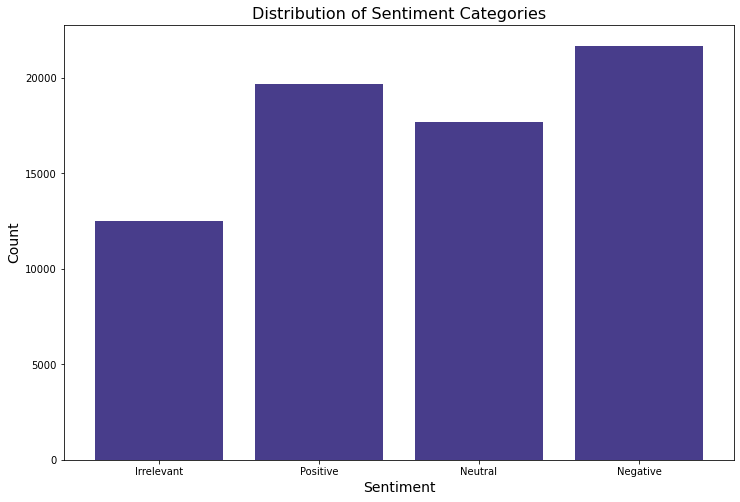

In [269]:
# Plotting a graph of distribution
plt.figure(figsize=(12, 8))
plt.bar(sentiment_distribution_pd['sentiment'], sentiment_distribution_pd['count'], color='DarkSlateBlue')
plt.title('Distribution of Sentiment Categories', fontsize = 16)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

In [270]:
#pip install seaborn

In [271]:
import seaborn as sns

In [272]:
# Selecting a specific entity to analyse
entity_of_interest = 'johnson&johnson'

In [273]:
# Filtering the DataFrame 
johnson_johnson_df = twitter_df_preprocessing.filter(twitter_df_preprocessing.entity == entity_of_interest)

johnson_johnson_df.show()

+--------+---------------+----------+--------------------+
|tweet_ID|         entity| sentiment|       tweet_content|
+--------+---------------+----------+--------------------+
|    6853|johnson&johnson|   Neutral|Adrian Thomas, vi...|
|    6866|johnson&johnson|Irrelevant| Vaccines Production|
|    6890|johnson&johnson|  Negative|They've had a leg...|
|    6909|johnson&johnson|   Neutral|Behind the $55 mi...|
|    6940|johnson&johnson|   Neutral|.  TYLENOL Cold H...|
|    6944|johnson&johnson|   Neutral|The Missouri Cour...|
|    6955|johnson&johnson|  Negative|Johnson & The Joh...|
|    6965|johnson&johnson|  Negative|              or wtf|
|    6971|johnson&johnson|  Positive|AstraZeneca and J...|
|    6973|johnson&johnson|  Positive|       Thank of God.|
|    6998|johnson&johnson|  Positive|cock & Johnson Re...|
|    7005|johnson&johnson|   Neutral|Johnson & Johnson...|
|    7040|johnson&johnson|   Neutral|Transvaginal mesh...|
|    7043|johnson&johnson|  Negative|Johnson & Johnson..

In [274]:
# Calculating the distribution of sentiment categories
johnson_johnson_sentiment_distribution = johnson_johnson_df.groupBy('sentiment').count()
johnson_johnson_sentiment_distribution.show()

+----------+-----+
| sentiment|count|
+----------+-----+
|Irrelevant|  192|
|   Neutral| 1001|
|  Positive|  252|
|  Negative|  809|
+----------+-----+



In [275]:
# Ordering the DataFrame in descending order
johnson_johnson_sentiment_distribution = johnson_johnson_sentiment_distribution.orderBy('count', ascending=False)

In [276]:
# Converting to Pandas DataFrame for visualization
johnson_johnson_sentiment_distribution_pd = johnson_johnson_sentiment_distribution.toPandas()

/tmp/ipykernel_4431/78352180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=johnson_johnson_sentiment_distribution_pd, palette='viridis')


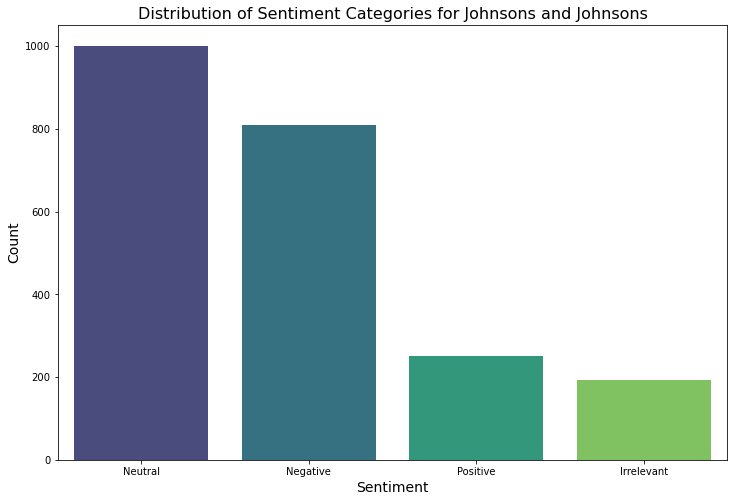

In [277]:
# Creating a Seaborn Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment', y='count', data=johnson_johnson_sentiment_distribution_pd, palette='viridis')
plt.title('Distribution of Sentiment Categories for Johnsons and Johnsons', fontsize = 16)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

One of the main applications and use cases of this asignment is sentiment analysis of big data, whether from a live stream or static source. In order to recreate this, we will remove the sentiment column provided with the dataset and conduct our own sentiment analysis of the data using spark.

In [278]:
# Dropping the 'sentiment' column
twitter_df_preprocessing = twitter_df_preprocessing.drop('sentiment')

In [279]:
twitter_df_preprocessing.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- tweet_content: string (nullable = true)



#### Saving to HDFS

In [280]:
path = "/user1/twitter2"

In [281]:
twitter_df_preprocessing.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()

## Reading in  a new Dataset of larger volume

In [282]:
twitter_cs = "/user1/twcs.csv"

twitter_cs_df = spark.read.csv(twitter_cs, header='true', inferSchema='true')
twitter_cs_df.createOrReplaceTempView("twitter_cs")

In [283]:
twitter_cs_df.printSchema()

root
 |-- tweet_id: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: string (nullable = true)
 |-- in_response_to_tweet_id: string (nullable = true)



In [284]:
twitter_cs_df.show()

+--------+------------+-------+--------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|          created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+--------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|Tue Oct 31 22:10:...|@115712 I underst...|                2|                      3|
|       2|      115712|   True|Tue Oct 31 22:11:...|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|Tue Oct 31 22:08:...|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|Tue Oct 31 21:54:...|@115712 Please se...|                3|                      5|
|       5|      115712|   True|Tue Oct 31 21:49:...|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|Tue Oct 31 21:46:...|@115712 Can you p...

### EDA: Characterising, Cleaning and Data Prep

#### Checking the number of rows and columns

In [285]:
# Checking the shape of the DataFrame
num_rows = twitter_cs_df.count()
num_columns = len(twitter_cs_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2966469
Number of Columns: 7


#### Checking for missing values

In [286]:
# Importing the required functions
from pyspark.sql.functions import col, sum as spark_sum

In [287]:
# Counting missing values for each feature column
missing_values = twitter_cs_df.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_cs_df.columns))

# Displaying the missing value count
missing_values.show()

+--------+---------+-------+----------+------+-----------------+-----------------------+
|tweet_id|author_id|inbound|created_at|  text|response_tweet_id|in_response_to_tweet_id|
+--------+---------+-------+----------+------+-----------------+-----------------------+
|      20|    68072|  86934|    146363|153179|          1271596|                1010542|
+--------+---------+-------+----------+------+-----------------+-----------------------+



We see that every column contains missing values. This may be normal for 'response_tweet_id' and 'in_response_to_tweet_id' as not every tweet is in response or recieves a response. The missing values would need to be handled according to the analysis being conducted and the nature of the missing values, whether missing at random (MAR), missing completely at random (MCAR) or missing not at random (MNAR). Missing values may be imputed based on statistical findings, removed, flagged or ignored. Domain knowledge would significantly aid in determining the best method. In developing a predictive model, missing values could significatly impact the models performance. As our intent is to demontrate the effectiveness of processing and analysing big data using Spark, which we intent to do using map-reduce, word count and sentiment analysis of the 'text', we will deal with them if and when we need to.

#### Checking for duplicate rows

In [288]:
print('Count of rows: {0}'.format(twitter_cs_df.count()))
print('Count of distinct rows: {0}'.format(twitter_cs_df.distinct().count()))
dif = ((twitter_cs_df.count()) - (twitter_cs_df.distinct().count()))
print(f'There are {dif} duplicate rows.')

Count of rows: 2966469


Count of distinct rows: 2954825


There are 11644 duplicate rows.


In [289]:
# # Remove duplicate rows
# twitter_cs_df_no_duplicates = twitter_cs_df.dropDuplicates()

# # Check the shape of the DataFrame after removing duplicates
# num_rows_no_duplicates = twitter_cs_df_no_duplicates.count()
# num_columns_no_duplicates = len(twitter_cs_df_no_duplicates.columns)

# print("The shape of the DataFrame after removing duplicates:\n")
# print("Number of Rows:", num_rows_no_duplicates)
# print("Number of Columns:", num_columns_no_duplicates)

In [290]:
# List of columns that we want to iterate through
columns_to_check = twitter_cs_df.columns

#  for loop to iterate through each column to identify duplicate rows
for col_name in columns_to_check:
    
    # Grouping the current column and the count occurrences
    duplicate_rows = twitter_cs_df.groupBy(col_name).count().where('count > 1')
    
    # Sorting in descending order and display the top 20
    print(f"Top 20 duplicates based on column '{col_name}' in descending order of count:")
    duplicate_rows.orderBy(col("count").desc()).show(n=20)

Top 20 duplicates based on column 'tweet_id' in descending order of count:


+--------------------+-----+
|            tweet_id|count|
+--------------------+-----+
|             Regards| 4484|
|                Rgds| 1808|
|               ^HSB"| 1421|
|               ^ACM"|  980|
|               ^ADP"|  956|
|               ^NHP"|  918|
|             -Andre"|  913|
|               ^TXA"|  852|
| https://t.co/EYp...|  846|
|           Darshan."|  829|
|               ^JAY"|  807|
|               ^TDC"|  767|
|               ^FEM"|  745|
|               ^BAB"|  719|
|              Thanks|  656|
|             Amruta"|  534|
|               ^TNT"|  518|
|                ^RR"|  508|
|                ^MD"|  496|
|               ^CAR"|  453|
+--------------------+-----+
only showing top 20 rows

Top 20 duplicates based on column 'author_id' in descending order of count:


+---------------+------+
|      author_id| count|
+---------------+------+
|     AmazonHelp|169840|
|   AppleSupport|106860|
|           null| 68072|
|   Uber_Support| 56270|
|   SpotifyCares| 43265|
|          Delta| 42253|
|          Tesco| 38573|
|    AmericanAir| 36764|
|    TMobileHelp| 34317|
|   comcastcares| 33031|
|British_Airways| 29361|
|   SouthwestAir| 28977|
|   VirginTrains| 27817|
|   Ask_Spectrum| 25860|
|    XboxSupport| 24557|
|     sprintcare| 22381|
|   hulu_support| 21872|
|     sainsburys| 19466|
|        GWRHelp| 19364|
| AskPlayStation| 19098|
+---------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'inbound' in descending order of count:


+--------------------+-------+
|             inbound|  count|
+--------------------+-------+
|                True|1537843|
|               False|1273931|
|                null|  86934|
|                5965|     19|
|              514494|     17|
|                    |     13|
|              961019|     10|
| as we consider i...|      8|
|             1296040|      8|
|              625011|      8|
|               50714|      7|
|               32886|      7|
|              727482|      7|
|              776192|      7|
|              691490|      6|
|              778409|      6|
|               37012|      6|
|              323165|      6|
| so kindly reply ...|      6|
|               19137|      6|
+--------------------+-------+
only showing top 20 rows

Top 20 duplicates based on column 'created_at' in descending order of count:


24/04/17 19:48:55 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+--------------------+------+
|          created_at| count|
+--------------------+------+
|                null|146363|
|Wed Oct 18 10:15:...|    18|
|Fri Dec 01 19:18:...|    15|
|Sat Dec 02 00:53:...|    15|
|Sun Nov 26 16:33:...|    14|
|Fri Dec 01 19:23:...|    13|
|Sun Nov 19 23:29:...|    13|
|Fri Oct 27 13:00:...|    13|
|Sat Nov 25 14:00:...|    12|
|Sun Dec 03 17:43:...|    12|
|Sun Nov 26 16:33:...|    12|
|Sun Oct 08 10:32:...|    12|
|Thu Nov 16 14:00:...|    12|
|Fri Nov 03 18:48:...|    11|
|Mon Nov 06 14:00:...|    11|
|Fri Nov 17 16:53:...|    11|
|Mon Nov 13 14:00:...|    11|
|Mon Oct 16 18:18:...|    11|
|Thu Oct 12 17:48:...|    11|
|Thu Oct 05 04:22:...|    11|
+--------------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'text' in descending order of count:


24/04/17 19:49:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+--------------------+------+
|                text| count|
+--------------------+------+
|                null|153179|
|       @ComcastCares|  3051|
|     @AirAsiaSupport|   418|
|            @115850 |   344|
|@Uber_Support __e...|   315|
|      @Uber_Support |   298|
|@azuresupport #az...|   290|
|        @AmazonHelp |   267|
|      @AppleSupport |   256|
|    @AirAsiaSupport |   222|
|@HPSupport [TYPE ...|   202|
|    @AskPlayStation |   188|
| @VerizonSupport Yes|   179|
|@AppleSupport 11.0.3|   177|
|        @idea_cares |   176|
|    @Safaricom_Care |   172|
|     @AmazonHelp Yes|   165|
|@ComcastCares: #m...|   150|
|       @AppleSupport|   147|
|  @Uber_Support Done|   142|
+--------------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'response_tweet_id' in descending order of count:


+--------------------+-------+
|   response_tweet_id|  count|
+--------------------+-------+
|                null|1271596|
| then change it b...|     13|
|             right?"|     11|
| and entering you...|     10|
| please visit; ht...|      9|
|            please?"|      7|
|                   F|      7|
|               etc."|      6|
|                ^AK"|      6|
|              though|      5|
| please try again...|      5|
|                 M-F|      5|
|            thanks!"|      5|
|            thanks."|      5|
|                   -|      5|
|          start over|      5|
|         thank you."|      4|
|       Monday-Friday|      4|
| and then select ...|      4|
| Weekly and Month...|      4|
+--------------------+-------+
only showing top 20 rows

Top 20 duplicates based on column 'in_response_to_tweet_id' in descending order of count:


+-----------------------+-------+
|in_response_to_tweet_id|  count|
+-----------------------+-------+
|                   null|1010542|
|                 625011|    827|
|                 776192|    552|
|                  37012|    291|
|                  87814|    171|
|                   5965|    164|
|                2390546|    163|
|                  56184|    160|
|                 677161|    137|
|                 615427|    136|
|                    409|    133|
|                 692392|    129|
|                2572370|    127|
|                 414715|    121|
|                 189825|    117|
|                  15807|    116|
|                   5159|    114|
|                  19541|    107|
|                  82436|    104|
|                1343823|    102|
+-----------------------+-------+
only showing top 20 rows



Again we find that the dataset contains numerous duplicate entries per column. This is to be expected as the same identifiers for 'author_id', 'response_tweet_id' and 'in_response_to_tweet_id' are being used to track teweets. 'inbound' is expected to be a catergorical varaible of either True or False but appears to conatin other values, while 'tweet_id' is expected to be unique and of integer type but also contains mixed values. As with the missing values, this would need to be handled based on the intended use. Ignoring them should not affect our sentiment or word frequency analysis, but we will clean the dataset to aid in further EDA with graphics. 

### Preprocessing: Data Types and Null values

 Type casting the 'tweet_id', 'response_tweet_id', and 'in_response_to_tweet_id' to there correct integer datatypes.

In [291]:
# Converting tweet_id column to integer and dropping rows/filtering with non-integer values
twitter_cs_preprocessing_df = twitter_cs_df.withColumn("tweet_id", col("tweet_id").cast("int")) \
    .filter(col("tweet_id").isNotNull())

In [292]:
from pyspark.sql.functions import col, when

In [293]:
# Type Casting 'response_tweet_id' column to integer and replace missing values with 'None'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("response_tweet_id", \
    when(col("response_tweet_id").isNull(), None).otherwise(col("response_tweet_id").cast("int")))

In [294]:
# Type Casting 'in_response_to_tweet_id' column to integer and replace missing values with 'None'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("in_response_to_tweet_id", \
    when(col("in_response_to_tweet_id").isNull(), None).otherwise(col("in_response_to_tweet_id").cast("int")))

In [295]:
# Viewing the changes
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



In [296]:
# Checking the new shape of the DataFrame
num_rows = twitter_cs_preprocessing_df.count()
num_columns = len(twitter_cs_preprocessing_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 7


 Cleaning the 'inbound' column which should only contain 'True' and 'False' values but imputing others with 'Unknown'

In [297]:
# Importing sparksql function
from pyspark.sql.functions import when

In [298]:
# Replace values other than 'True' or 'False', including null, with 'Unknown'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("inbound", when((col("inbound") == "True") | 
                                                         (col("inbound") == "False"), 
                                                         col("inbound")).otherwise("Unknown"))

In [299]:
unique_inbound_values = twitter_cs_preprocessing_df.groupBy("inbound").count().collect()
print("Unique values and their counts in 'inbound' column:")
for row in unique_inbound_values:
    print(f"{row['inbound']}: {row['count']}")

Unique values and their counts in 'inbound' column:
False: 1273931
Unknown: 530
True: 1537843


Type casting the 'created_at' column to its correct data type datetime using timestamp

In [300]:
from pyspark.sql.functions import to_timestamp

In [301]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [302]:
# Casting 'created_at' column to datetime
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("created_at", \
    to_timestamp("created_at", "EEE MMM dd HH:mm:ss Z yyyy"))

In [303]:
twitter_cs_preprocessing_df.show()

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

In [304]:
# Viewing the changes
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



### EDA: Statistical Description

In [305]:
# Viewing the basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
twitter_cs_preprocessing_df.describe().show()


Basic Statistics for Numerical Columns:


+-------+------------------+------------------+-------+-------------------+------------------+-----------------------+
|summary|          tweet_id|         author_id|inbound|               text| response_tweet_id|in_response_to_tweet_id|
+-------+------------------+------------------+-------+-------------------+------------------+-----------------------+
|  count|           2812304|           2811828|2812304|            2811783|           1477184|                1953086|
|   mean|1508979.4198792165|423300.33347682294|   null|  1.3826924659675E9|1514870.6502284075|     1463420.6321385745|
| stddev|2176779.8277876023|207169.43218544274|   null|3.174050310345598E9| 865950.1322858942|      864586.6791693122|
|    min|             -2017|              1331|  False|              69.61|                 1|                      0|
|    max|        1403649393|        sprintcare|Unknown|        🧕🏽 @delta|           2987947|                2987950|
+-------+------------------+------------------+---

In [306]:
# Convert Spark DataFrame to Pandas DataFrame
statistics_pd = twitter_cs_preprocessing_df.describe().toPandas()

# Display the Pandas DataFrame
print("\nBasic Statistics for Numerical Columns:")
statistics_pd


Basic Statistics for Numerical Columns:


,summary,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,count,2812304,2811828,2812304,2811783,1477184,1953086
1,mean,1508979.4198792165,423300.33347682294,None,1.3826924659675E9,1514870.6502284075,1463420.6321385745
2,stddev,2176779.8277876023,207169.43218544274,None,3.174050310345598E9,865950.1322858942,864586.6791693122
3,min,-2017,1331,False,69.61,1,0
4,max,1403649393,sprintcare,Unknown,🧕🏽 @delta,2987947,2987950


### EDA: with Graphics

In [307]:
# Grouping by author_id and counting the occurrences
author_counts = twitter_cs_preprocessing_df.groupBy("author_id").count().orderBy("count", ascending=False)
author_counts.show()

+---------------+------+
|      author_id| count|
+---------------+------+
|     AmazonHelp|169840|
|   AppleSupport|106860|
|   Uber_Support| 56270|
|   SpotifyCares| 43265|
|          Delta| 42253|
|          Tesco| 38573|
|    AmericanAir| 36764|
|    TMobileHelp| 34317|
|   comcastcares| 33031|
|British_Airways| 29361|
|   SouthwestAir| 28977|
|   VirginTrains| 27817|
|   Ask_Spectrum| 25860|
|    XboxSupport| 24557|
|     sprintcare| 22381|
|   hulu_support| 21872|
|     sainsburys| 19466|
|        GWRHelp| 19364|
| AskPlayStation| 19098|
| ChipotleTweets| 18749|
+---------------+------+
only showing top 20 rows



In [308]:
# Importing libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# Converting to Pandas DataFrame and limiting to the top 15 authors
top_authors_pd = author_counts.limit(20).toPandas()

In [310]:
# Filtering out null values before plotting
top_authors_pd_filtered = top_authors_pd[top_authors_pd['author_id'].notna()]

/tmp/ipykernel_4431/2704774328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_authors_pd_filtered["author_id"], y = top_authors_pd_filtered["count"], palette='viridis')


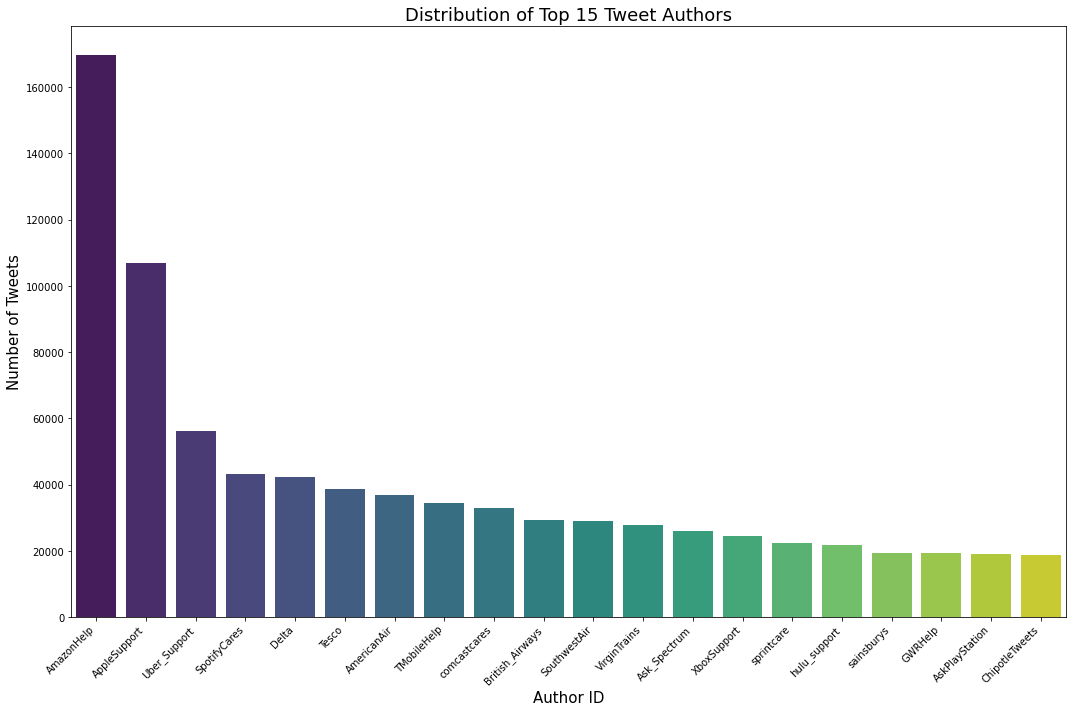

In [311]:
# Plotting the distribution of top 120 tweet authors
plt.figure(figsize=(15, 10))
sns.barplot(x = top_authors_pd_filtered["author_id"], y = top_authors_pd_filtered["count"], palette='viridis')
plt.xlabel('Author ID', fontsize = 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.title('Distribution of Top 15 Tweet Authors', fontsize = 18)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

From the information within this dataset we find that AmazonHelp and AppleSupport customer support are the most frequently tweeting customer support teams with almost twice as meany as the remaining top 20 combined.

In [312]:
# Grouping the data by 'inbound' column and counting the occurrences
inbound_outbound_counts = twitter_cs_preprocessing_df.groupBy("inbound").count().toPandas()

In [313]:
# Sorting the DataFrame by count in descending order
inbound_outbound_counts = inbound_outbound_counts.sort_values(by="count", ascending=False)

In [314]:
# Converting counts to millions for readability
inbound_outbound_counts["count_millions"] = inbound_outbound_counts["count"] / 1000000

/tmp/ipykernel_4431/40282955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = inbound_outbound_counts, x = "inbound", y = "count_millions", palette='Dark2')


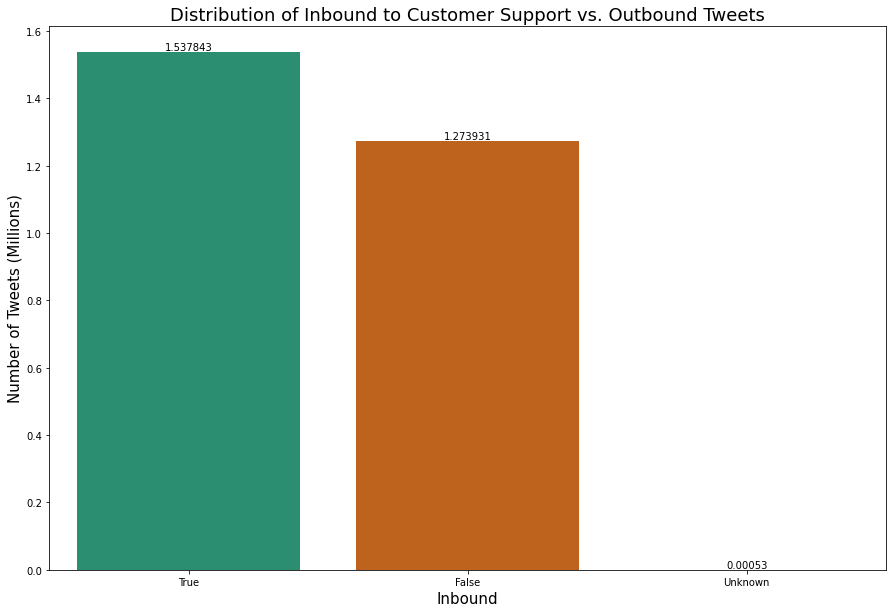

In [315]:
# Plotting the distribution of 'inbound'
plt.figure(figsize=(15, 10))
ax = sns.barplot(data = inbound_outbound_counts, x = "inbound", y = "count_millions", palette='Dark2')
plt.xlabel('Inbound', fontsize = 15)
plt.ylabel('Number of Tweets (Millions)', fontsize = 15)
plt.title('Distribution of Inbound to Customer Support vs. Outbound Tweets', fontsize = 18)
for index, value in enumerate(inbound_outbound_counts["count_millions"]):
    plt.text(index, value, str(value), ha ='center', va = 'bottom',  fontsize=10)

plt.show()

Based on the visual above we find that customer support teams do not respond to every tweet directed there way.

In [316]:
from pyspark.sql.functions import length

In [317]:
# Calculating lengths of each tweet
twitter_cs_preprocessing_df2 = twitter_cs_preprocessing_df.withColumn("tweet_length", length("text"))

In [318]:
twitter_cs_preprocessing_df2.show(truncate = 14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|tweet_length|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|         121|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|          45|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|          82|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|         124|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|          18|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|   

In [319]:
twitter_cs_preprocessing_df2.select('text', 'tweet_length').show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|text                                                                                                                                                                |tweet_length|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.                                           |121         |
|@sprintcare and how do you propose we do that                                                                                                                       |45          |
|@sprintcare I have sent several private messages and no one is responding as usual                 

In [320]:
# Converting from Spark DataFrame to Pandas DataFrame for plotting
tweet_length_pd = twitter_cs_preprocessing_df2.select("tweet_length").toPandas()

In [321]:
import pandas as pd

# Disabling scientific notation
pd.options.display.float_format = '{:.2f}'.format

tweet_length_pd['tweet_length'].describe()

count   2811783.00
mean        111.34
std          52.26
min           1.00
25%          75.00
50%         113.00
75%         139.00
max         513.00
Name: tweet_length, dtype: float64

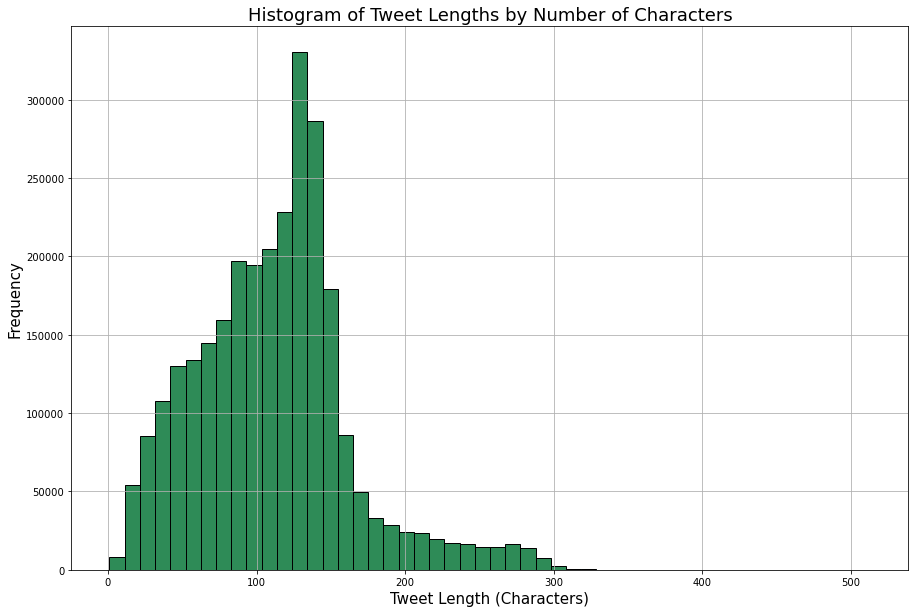

In [322]:
plt.figure(figsize=(15, 10))
plt.hist(tweet_length_pd["tweet_length"], bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Characters)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Histogram of Tweet Lengths by Number of Characters', fontsize = 18)
plt.grid(True)
plt.show()

We find that the distribution of characters for tweets is right skewed. Most tweets contain around 111 characters with a standard deviation of around 52 characters. There are outliers with over 500 characters.

In [323]:
#from pyspark.sql.functions import year, month
from pyspark.sql import functions as F
from pyspark.sql.functions import col, date_format, dayofweek, month, year

In [324]:
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df2.filter(col("created_at").isNotNull())

# Engineering new columns for plotting
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("day_of_week", dayofweek("created_at"))
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("month", month("created_at"))
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("year", year("created_at"))

In [325]:
# Grouping by and counting tweets by the days of the week
tweets_by_day_of_week = twitter_cs_preprocessing_df3.groupBy("day_of_week").count().orderBy("day_of_week")

In [326]:
tweets_by_day_of_week_pd = tweets_by_day_of_week.toPandas()

/tmp/ipykernel_4431/3077784446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="count", data=tweets_by_day_of_week_pd, palette="Dark2")


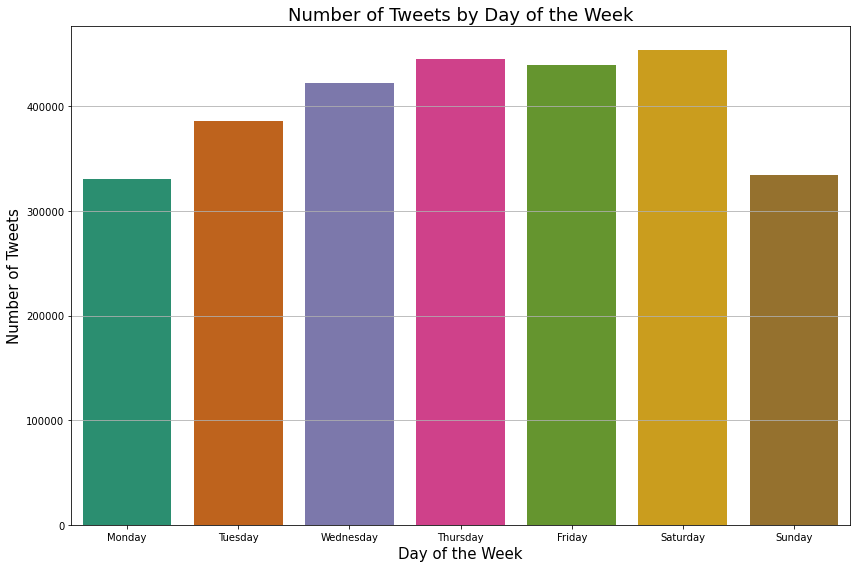

In [327]:
plt.figure(figsize=(12, 8))
sns.barplot(x="day_of_week", y="count", data=tweets_by_day_of_week_pd, palette="Dark2")
plt.xlabel('Day of the Week', fontsize = 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.title('Number of Tweets by Day of the Week', fontsize = 18)
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

From the visual above we find that the fewest tweet to and from customer support occur on a Monday and Sunday, while Thursday, Friday and Saturday produce the highest traffic. This is useful information when allocating resources for customer support.

In [328]:
# Checking the new shape of the DataFrame
num_rows = twitter_cs_preprocessing_df.count()
num_columns = len(twitter_cs_preprocessing_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 7


In [329]:
twitter_cs_preprocessing_df.show()  

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

#### First attempt at applying an index to the dataframe so as to preserve the same order on reading

In [330]:
from pyspark.sql.functions import monotonically_increasing_id

In [331]:
# Adding a unique ID column to the DataFrame for ordering
twitter_cs_preprocessing_df_with_row_id = twitter_cs_preprocessing_df.withColumn("row_id", monotonically_increasing_id() + 1)

In [332]:
twitter_cs_preprocessing_df_with_row_id.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|row_id|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|     1|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|     2|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|     3|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|     4|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|     5|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|             null|                      8|     6|
|

In [333]:
# Viewing the changes
twitter_cs_preprocessing_df_with_id.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- row_id: long (nullable = false)



In [334]:
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



#### Second attempt at applying an index to the dataframe so as to preserve the same order on reading

In [335]:
rdd_df = twitter_cs_preprocessing_df.rdd.zipWithIndex()

In [336]:
indexed_df = rdd_df.toDF(['data', 'index'])

In [337]:
indexed_df.show()

+--------------------+-----+
|                data|index|
+--------------------+-----+
|{1, sprintcare, F...|    0|
|{2, 115712, True,...|    1|
|{3, 115712, True,...|    2|
|{4, sprintcare, F...|    3|
|{5, 115712, True,...|    4|
|{6, sprintcare, F...|    5|
|{8, 115712, True,...|    6|
|{11, sprintcare, ...|    7|
|{12, 115713, True...|    8|
|{15, sprintcare, ...|    9|
|{16, 115713, True...|   10|
|{17, sprintcare, ...|   11|
|{18, 115713, True...|   12|
|{19, sprintcare, ...|   13|
|{20, 115715, True...|   14|
|{21, Ask_Spectrum...|   15|
|{22, 115716, True...|   16|
|{25, Ask_Spectrum...|   17|
|{26, 115716, True...|   18|
|{27, Ask_Spectrum...|   19|
+--------------------+-----+
only showing top 20 rows



In [338]:
twitter_cs_preprocessing_df_with_index = indexed_df.select('data.*', 'index')

In [339]:
twitter_cs_preprocessing_df_with_index.show(truncate = 12)

+--------+------------+-------+------------+------------+-----------------+-----------------------+-----+
|tweet_id|   author_id|inbound|  created_at|        text|response_tweet_id|in_response_to_tweet_id|index|
+--------+------------+-------+------------+------------+-----------------+-----------------------+-----+
|       1|  sprintcare|  False|2017-10-3...|@115712 I...|                2|                      3|    0|
|       2|      115712|   True|2017-10-3...|@sprintca...|             null|                      1|    1|
|       3|      115712|   True|2017-10-3...|@sprintca...|                1|                      4|    2|
|       4|  sprintcare|  False|2017-10-3...|@115712 P...|                3|                      5|    3|
|       5|      115712|   True|2017-10-3...|@sprintca...|                4|                      6|    4|
|       6|  sprintcare|  False|2017-10-3...|@115712 C...|             null|                      8|    5|
|       8|      115712|   True|2017-10-3...|@s

In [340]:
# Viewing the changes
twitter_cs_preprocessing_df_with_index.printSchema()

root
 |-- tweet_id: long (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: long (nullable = true)
 |-- in_response_to_tweet_id: long (nullable = true)
 |-- index: long (nullable = true)



In [341]:
twitter_cs_preprocessing_df2.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|tweet_length|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|         121|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|          45|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|          82|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|         124|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|          18|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|   

### Writing to HDFS

#### First Attempt: Save Dataframe and Scheme

In [101]:
# # Save DataFrame as CSV
# csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"
# twitter_cs_preprocessing_df.write.csv(csv_path, mode="overwrite", header=True)

# # Save Schema as Text File
# schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.txt"
# schema_str = str(twitter_cs_preprocessing_df.schema)
# sc.parallelize([schema_str]).saveAsTextFile(schema_path)

#### Second Attempt: Save Dataframe and Scheme

In [116]:
# import json
# import os

# # Saving the DataFrame as CSV
# csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"
# twitter_cs_preprocessing_df_with_row_id.write.csv(csv_path, mode="overwrite", header=True)

# schema_json = twitter_cs_preprocessing_df_with_row_id.schema.json()

# # Specifying the directory path
# directory_path = "hdfs://localhost:9000/user1/twitter_customer_support/"

# # Creating a directory if it does not exist
# os.makedirs(directory_path, exist_ok=True)

# # Specifying the schema JSON file path
# schema_path = os.path.join(directory_path, "schema.json")

# # Saving the schema JSON file
# with open(schema_path, "w") as file:
#     file.write(schema_json)

#### Third Attempt: Save just the Dataframe

First write with dataframe indexed using 'monotonically_increasing_id()'

In [342]:
path = "/user1/twitter_customer_support"

In [343]:
# Saving the dataframe as a csv
twitter_cs_preprocessing_df_with_row_id.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()

Second write with dataframe indexed using 'zipWithIndex()'

In [344]:
path = "/user1/twitter_customer_support_indexed"

In [345]:
# Saving the dataframe as a csv
twitter_cs_preprocessing_df_with_index.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()

### Reading from HDFS

#### First Attempt: loading Dataframe and Schema

In [ ]:
# # Defining the HDFS path where the CSV file and schema file are saved
# path = "/user1/twitter_customer_support"


# # Reading in the CSV file with the saved schema
# twitter_cs_preprocessing_df = spark.read \
#     .format("csv") \
#     .option("header", "true") \
#     .option("inferSchema", "true") \
#     .load(path)

#### Second Attempt: loading Dataframe and Schema

In [117]:
# # Specify the CSV file path
# csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"

# # Read the CSV file into a DataFrame
# df_with_schema = spark.read.csv(csv_path, header=True)

# # Specify the schema JSON file path
# schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.json"

# # Read the schema JSON file
# with open(schema_path, "r") as file:
#     schema_json = file.read()

# # Parse the schema JSON string into a StructType object
# parsed_schema = StructType.fromJson(json.loads(schema_json))

# # Apply the parsed schema to the DataFrame
# for field in parsed_schema:
#     df_with_schema = df_with_schema.withColumnRenamed(field.name, field.name)

In [118]:
#df_with_schema.printSchema()

root
 |-- tweet_id: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: string (nullable = true)
 |-- in_response_to_tweet_id: string (nullable = true)
 |-- row_id: string (nullable = true)



The Schema has loaded but the datatypes are inconsistant with those saved. Additionally the ordering due to partioning, parallesism or HDFS splitting and merging has changed.

In [120]:
#df_with_schema.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+----------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|    row_id|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+----------+
|  816047|  ATVIAssist|  False|2017-10-13T...|@314317 No ...|           816048|                 816046|8589934593|
|  816048|      314317|   True|2017-10-13T...|@ATVIAssist...|             null|                 816047|8589934594|
|  816049|  ATVIAssist|  False|2017-10-13T...|@314317 ......|             null|                 816048|8589934595|
|  816050|  ATVIAssist|  False|2017-10-13T...|@314317 No ...|             null|                 816048|8589934596|
|  816044|      314317|   True|2017-10-12T...|@122172 @AT...|           816042|                   null|8589934597|
|  816051|  ATVIAssist|  False|2017-10-12T...|@314318 Hey...|             null| 

#### Third Attempt: loading Dataframe and Specifiying Scheme

In [131]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, LongType

# Defining the HDFS path where the CSV file and schema file are saved
path = "/user1/twitter_customer_support"

newSchema = StructType([\
                       StructField("tweet_id", IntegerType(), True),
                       StructField("author_id", StringType(), True),
                       StructField("inbound", StringType(), True),
                       StructField("created_at", TimestampType(), True),
                       StructField("text", StringType(), True),
                       StructField("response_tweet_id", IntegerType(), True),
                       StructField("in_response_to_tweet_id", IntegerType(), True),
                       StructField("row_id", LongType(), True)
                       ])

df = spark.read.format("csv")\
    .schema (newSchema)\
    .option("inferSchema", "True")\
    .option("path", path)\
    .load()


In [132]:
df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- row_id: long (nullable = true)



In [133]:
df.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+----------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|    row_id|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+----------+
|  816047|  ATVIAssist|  False|2017-10-13 ...|@314317 No ...|           816048|                 816046|8589934593|
|  816048|      314317|   True|2017-10-13 ...|@ATVIAssist...|             null|                 816047|8589934594|
|  816049|  ATVIAssist|  False|2017-10-13 ...|@314317 ......|             null|                 816048|8589934595|
|  816050|  ATVIAssist|  False|2017-10-13 ...|@314317 No ...|             null|                 816048|8589934596|
|  816044|      314317|   True|2017-10-12 ...|@122172 @AT...|           816042|                   null|8589934597|
|  816051|  ATVIAssist|  False|2017-10-12 ...|@314318 Hey...|             null| 

The row_id numbers on the far right column appear to be incorrect. Although unique, the dataframe should not contain as many rows equivelant to the values. 

In [134]:
# Checking the new shape of the DataFrame
num_rows = df.count()
num_columns = len(df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 8


In [135]:
# Sorting the DataFrame by the row_id column
ordered_df = df.orderBy("row_id")
ordered_df.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|row_id|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|     1|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|     2|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|     3|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|     4|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|     5|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|             null|                      8|     6|
|

In [136]:
# Removing the temporary ID column
df = ordered_df.drop("row_id")

In [137]:
# Viewing reordered DataFrame
df.show()

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

### We will load in the second saved dataframe to HDFS with indexing by zipWithIndex.

In [1]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, LongType

# Defining the HDFS path 
path = "/user1/twitter_customer_support_indexed"

newSchema2 = StructType([\
                       StructField("tweet_id", IntegerType(), True),
                       StructField("author_id", StringType(), True),
                       StructField("inbound", StringType(), True),
                       StructField("created_at", TimestampType(), True),
                       StructField("text", StringType(), True),
                       StructField("response_tweet_id", IntegerType(), True),
                       StructField("in_response_to_tweet_id", IntegerType(), True),
                       StructField("index", LongType(), True)
                       ])

df_indexed = spark.read.format("csv")\
    .schema (newSchema2)\
    .option("inferSchema", "True")\
    .option("path", path)\
    .load()

In [2]:
df_indexed.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- index: long (nullable = true)



In [3]:
# Checking the new shape of the DataFrame
num_rows = df_indexed.count()
num_columns = len(df_indexed.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 8


In [4]:
df_indexed.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id| index|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|  816047|  ATVIAssist|  False|2017-10-13 ...|@314317 No ...|           816048|                 816046|730032|
|  816048|      314317|   True|2017-10-13 ...|@ATVIAssist...|             null|                 816047|730033|
|  816049|  ATVIAssist|  False|2017-10-13 ...|@314317 ......|             null|                 816048|730034|
|  816050|  ATVIAssist|  False|2017-10-13 ...|@314317 No ...|             null|                 816048|730035|
|  816044|      314317|   True|2017-10-12 ...|@122172 @AT...|           816042|                   null|730036|
|  816051|  ATVIAssist|  False|2017-10-12 ...|@314318 Hey...|             null|                 784626|730037|
|

At a glance, the numbers displayed in the 'index' column are more realistic than the monotonically_increasing_id method dataframe. To confirm that the zipWithIndex indexing has worked we will check for the maximum value and confirm that it is within the number of rows in the dataset. As the indexing started at 0, we would expect a max value of 2812303.

In checking this we will demonstrate another feature of Apache Spark in its ability to create temporary view tables and use SQL sytanx to make quick queries. Temporary views are lazily evaluated. They do not persist to memory unless explicity cache.

In [5]:
# Creating a temporary view from the DataFrame
df_indexed.createOrReplaceTempView("indexed_tweets_view")


In [6]:
# Querying the temp view using Spark SQL and syntax to find the largest number in the index column
max_index = spark.sql("SELECT MAX(index) AS max_index FROM indexed_tweets_view").collect()[0]["max_index"]


In [7]:
# Displaying the result
num_rows = df_indexed.count()
print(f"The largest number in the index column is {max_index}, one less than the {num_rows} rows in the dataframe as the indexing starts at 0.")

The largest number in the index column is 2812303, one less than the 2812304 rows in the dataframe as the indexing starts at 0.


This is the number we were expecting and hoping for. We conclude that the zipWithIndex method of indexing is more consistant than monotonically_increasing_id.

In [8]:
# Sorting the DataFrame by the row_id column
ordered_df = df_indexed.orderBy("index")
ordered_df.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+-----+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|index|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+-----+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|    0|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|    1|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|    2|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|    3|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|    4|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|             null|                      8|    5|
|       8|

In [9]:
# Removing the temporary ID column
df = ordered_df.drop("index")
# Viewing reordered DataFrame
df.show()

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

### Reading from HBase

In [10]:
# hbase_df = spark.read \
#     .format("org.apache.spark.sql.execution.datasources.hbase") \
#     .option("hbase.table", "your_hbase_table") \
#     .option("hbase.columns.mapping", "cf:col1,cf:col2") \
#     .load()


In [11]:
# # Show the DataFrame
# hbase_df.show()

In [12]:
# # Viewing the Schema
# hbase_df.printSchema()

In [13]:
# df_cached = hbase_df.cache()
# print(df_cached.count())

### Reloading Dependencies

In [3]:
# Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import explode, col, length

from operator import add

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Word Count: Tweet Length by Number of Words

On reading in the data we will now cache the Spark Dataframe to memory for faster access. This is one of the key features of Apache Spark which allow up to 100 times quicker processing than Hadoop Map-Reduce.

In [15]:
#df_cached = twitter_cs_preprocessing_df.cache()

In [16]:
df_cached = df.cache()

We will drop any null values within the 'text' column before tekenising the feature. The tokeniser function is provided by Sparks Machine Learning library. Another benefit provided over Hadoop Map-reduce.

In [17]:
df_cached = df_cached.dropna(subset=['text'])

In [18]:
from pyspark.ml.feature import Tokenizer

In [19]:
tokenizer = Tokenizer(inputCol = 'text',
                     outputCol = 'words')

In [20]:
df_cached = tokenizer.transform(df_cached)

In [21]:
df_cached.show(truncate=12)

+--------+------------+-------+------------+------------+-----------------+-----------------------+------------+
|tweet_id|   author_id|inbound|  created_at|        text|response_tweet_id|in_response_to_tweet_id|       words|
+--------+------------+-------+------------+------------+-----------------+-----------------------+------------+
|       1|  sprintcare|  False|2017-10-3...|@115712 I...|                2|                      3|[@115712,...|
|       2|      115712|   True|2017-10-3...|@sprintca...|             null|                      1|[@sprintc...|
|       3|      115712|   True|2017-10-3...|@sprintca...|                1|                      4|[@sprintc...|
|       4|  sprintcare|  False|2017-10-3...|@115712 P...|                3|                      5|[@115712,...|
|       5|      115712|   True|2017-10-3...|@sprintca...|                4|                      6|[@sprintc...|
|       6|  sprintcare|  False|2017-10-3...|@115712 C...|             null|                     

In [22]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

Will will use a User Defined Function (UDF) to demonstrate another feature in SparkSQL. UDF's allow us to customise functions in languages like Java, Scala or in ur case Python. Here we call the udf count_tokens which will count the number of words as integers in the words array column thats generated by the tokenizer.

In [23]:
count_tokens = udf(lambda words: len(words), IntegerType())

On applying the udf we create a new colum 'num_words' for the number of words within 'word' and keep the df in memory.

In [24]:
df_cached = df_cached.withColumn('num_words', count_tokens(df_cached.words)).cache()

Viewing the changes following tokenising and word count to the Schema.

In [25]:
df_cached.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- num_words: integer (nullable = true)



In [26]:
df_cached.show(truncate=10)

+--------+----------+-------+----------+----------+-----------------+-----------------------+----------+---------+
|tweet_id| author_id|inbound|created_at|      text|response_tweet_id|in_response_to_tweet_id|     words|num_words|
+--------+----------+-------+----------+----------+-----------------+-----------------------+----------+---------+
|       1|sprintcare|  False|2017-10...|@115712...|                2|                      3|[@11571...|       23|
|       2|    115712|   True|2017-10...|@sprint...|             null|                      1|[@sprin...|        9|
|       3|    115712|   True|2017-10...|@sprint...|                1|                      4|[@sprin...|       14|
|       4|sprintcare|  False|2017-10...|@115712...|                3|                      5|[@11571...|       23|
|       5|    115712|   True|2017-10...|@sprint...|                4|                      6|[@sprin...|        3|
|       6|sprintcare|  False|2017-10...|@115712...|             null|           

The warning highlights that the memory thats been allocated to Spark is insufficient. Spark computed that the RDD rdd_412_0 would require approximately 248.5 MiB of memory to cache, but as there was not enough available, it persisted the RDD to disk instead of caching it entirely in memory.

While we haven't directly used RDDs in the code, Spark DataFrames, which are built on top of RDDs, automatically manage partitions and parallelism. Spark distributes the data across partitions and executes operations in parallel, optimizing resource utilization.

Persisting RDDs to disk instead of caching them in memory can affect performance, as reading data from disk is slower compared to reading from memory. 

In [27]:
df_cached.select('words', 'num_words').show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|words                                                                                                                                                                                           |num_words|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|[@115712, i, understand., i, would, like, to, assist, you., we, would, need, to, get, you, into, a, private, secured, link, to, further, assist.]                                               |23       |
|[@sprintcare, and, how, do, you, propose, we, do, that]                                                                                                                            

### Method 1 for visualising tweet lengths by number of words using Panda Dataframe for visuals

Transforming from Spark dataframe to Pandas Dataframe can lead to memory pressures and out-of memory areas.  To free up resources we will first unpersist to disk.

In [28]:
df_cached.unpersist()
print(f"Is df_cached dataframe cached? {df_cached.is_cached}")

Is df_cached dataframe cached? False


In [29]:
# Converting from Spark DataFrame to Pandas DataFrame for plotting
num_words_pd = df_cached.select("num_words").toPandas()

24/04/19 16:38:50 WARN MemoryStore: Not enough space to cache rdd_42_191 in memory! (computed 1507.2 KiB so far)
24/04/19 16:38:50 WARN BlockManager: Persisting block rdd_42_191 to disk instead.
24/04/19 16:38:51 WARN MemoryStore: Not enough space to cache rdd_42_192 in memory! (computed 1499.1 KiB so far)
24/04/19 16:38:51 WARN BlockManager: Persisting block rdd_42_192 to disk instead.
24/04/19 16:38:52 WARN MemoryStore: Not enough space to cache rdd_42_195 in memory! (computed 1475.5 KiB so far)
24/04/19 16:38:52 WARN BlockManager: Persisting block rdd_42_195 to disk instead.


Snippet of Warning Message:
24/04/17 14:44:07 WARN MemoryStore: Not enough space to cache rdd_576_178 in memory! (computed 384.0 B so far)
24/04/17 14:44:08 WARN MemoryStore: Not enough space to cache rdd_576_179 in memory! (computed 3.8 MiB so far)
24/04/17 14:44:08 WARN BlockManager: Persisting block rdd_576_179 to disk instead.
24/04/17 14:44:08 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_576_179 in memory.
24/04/17 14:44:08 WARN MemoryStore: Not enough space to cache rdd_576_179 in memory! (computed 384.0 B so far)
24/04/17 14:44:09 WARN MemoryStore: Not enough space to cache rdd_576_183 in memory! (computed 3.8 MiB so far)
24/04/17 14:44:09 WARN BlockManager: Persisting block rdd_576_183 to disk instead.

It seems that the data is too large to fit into memory, resulting in an out-of-memory error. Applying the same code earlier for characters instead of words did not result in this error. It could be that words require more memory as characters are stored in bytes or that more resources were available at the time. Either way, it is a memory issue and attempting this process on a cached dataframe has used all available memory and failed to execute.

There are a number of ways around this including the proper use of cluster, providing more memory,or even sampling and processing in chunks. Although processing time will be increased, we will continue by persisting the dataframe to disk.

In [30]:
# # If the process above fails due to a lack of memory0
# # we will execute this block of code in which we attempt to persist
# # to disk

# from pyspark.storagelevel import StorageLevel

# # Persisting the DataFrame to disk before processing
# df_cached.persist(storageLevel=StorageLevel.DISK_ONLY)

# # Converting from Spark DataFrame to Pandas DataFrame for plotting
# num_words_pd = df_cached.select("num_words").toPandas()

The above code does not work as we intended. It still retains the Dataframe in memory. If issues with memory occur, we will unpersist the dataframe and free up cache resources by running the block of code below.

In [31]:
# # Unpersist Dataframe
# df_cached.unpersist()
# print(f"Is df_cached dataframe cached? {df_cached.is_cached}")

In [32]:
num_words_pd['num_words'].describe()

count    2.811783e+06
mean     1.914640e+01
std      9.659819e+00
min      1.000000e+00
25%      1.300000e+01
50%      1.900000e+01
75%      2.400000e+01
max      2.420000e+02
Name: num_words, dtype: float64

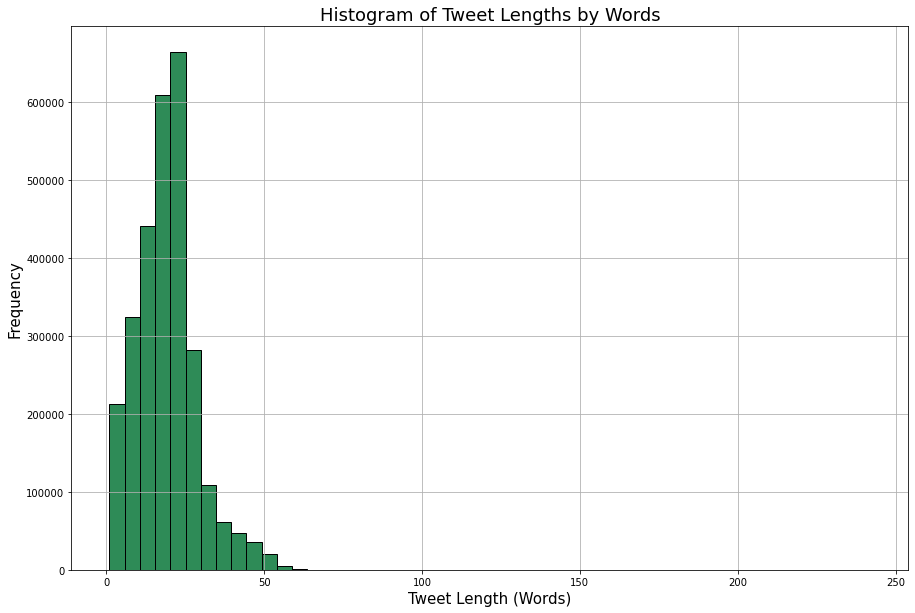

In [33]:
# Plotting the frequency distribution of tweets based on their word count
plt.figure(figsize=(15, 10))
plt.hist(num_words_pd["num_words"], bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Tweet Lengths by Words', fontsize=18)
plt.grid(True)
plt.show()

The histogram above allows us to visualise the spread of the number of words per tweet. As with for the distribution of tweet lengths by characters, the distribution by words appears right skewed. The distribution is off center toward the limit, with a tail strecthing away to the right.This is normal as we expect most tweet lengths to be on the lower end. There is atleast on outlier within the number of words, evident by the count on the x=axis extending up to 250.

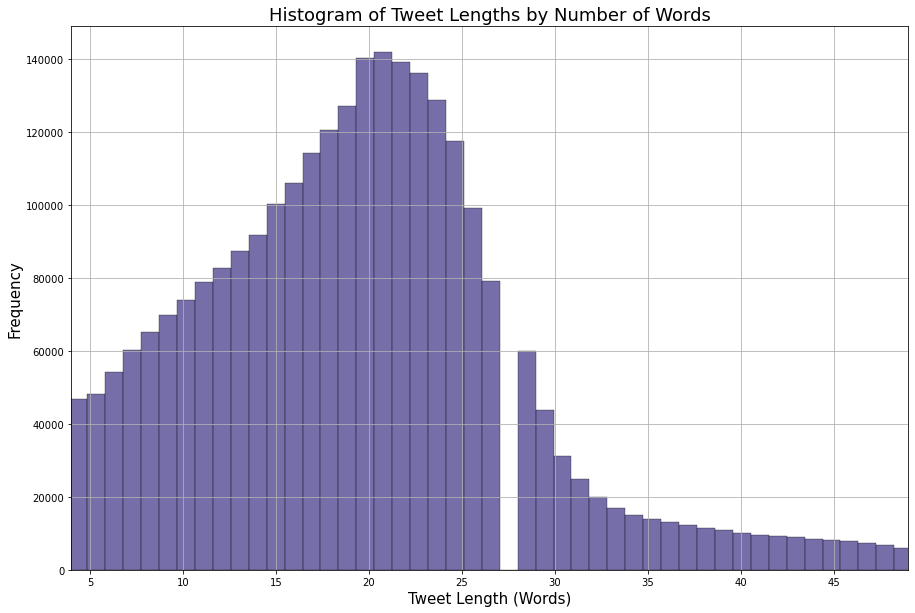

In [34]:
# Removing extreme outliers for words, in truth on the upper bound need be applied.
lower_bound, upper_bound = np.percentile(num_words_pd['num_words'], [5,99])

plt.figure(figsize=(15, 10))
sns.histplot(data=num_words_pd, x="num_words", bins=250, color='DarkSlateBlue', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Tweet Lengths by Number of Words', fontsize=18)
plt.grid(True)
plt.xlim(lower_bound, upper_bound)
plt.show()

Ultimately the same visual as above, but without the influence of extreme outliers in the 99 percentile for words. Removing them aids in producing a more readable graphic. We find the avrage number of words for a tweet to be around 20, with a standard deviation of around 10. There does not appear to be any tweets of 28 words.

### Method 2 for visualising tweet length by number of words using Spark RDD

Pandas Dataframes are single node and reside in memory. If the dataframe is too large and insufficient memory available, errors will occur. Spark Dataframes are distributed. Spark optimizes execution plans and parallelizes opretations where as pandas process data sequentially. To ease the processing loadd we will utilise Spark RDD's in creating our visual.

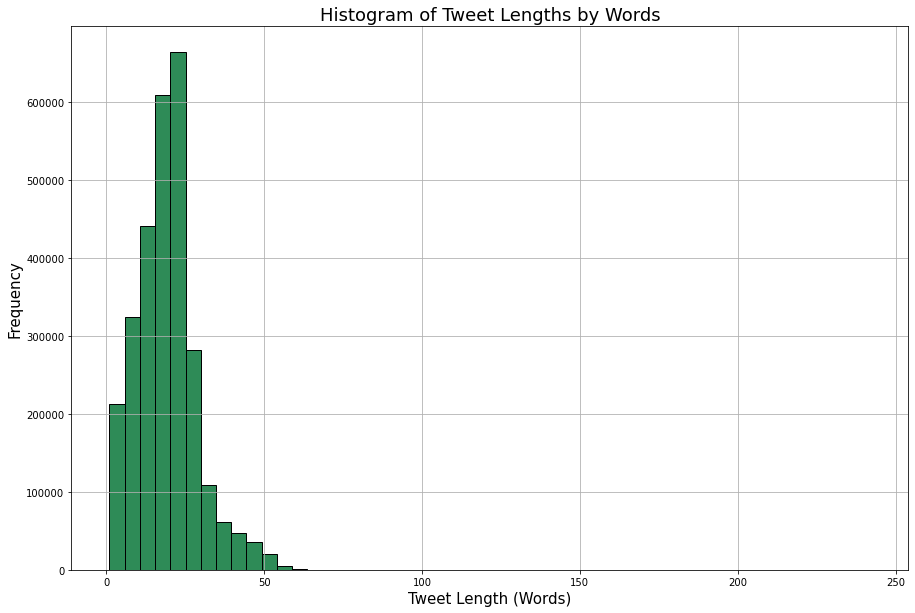

In [35]:

# Extracting the 'num_words' column as an RDD
num_words_rdd = df_cached.select("num_words").rdd.flatMap(lambda row: row)

# Collecting the RDD into a list
num_words_list = num_words_rdd.collect()

# Plotting the histogram
plt.figure(figsize=(15, 10))
plt.hist(num_words_list, bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Tweet Lengths by Words', fontsize=18)
plt.grid(True)
plt.show()

### Word Frequency 

In [36]:
import re
from operator import add

In [37]:
# Getting words from 'text' column
text_words = df_cached.select("text").rdd.flatMap(lambda row: re.split('\W+', row['text'].lower().strip()))

# Keeping words of more than 3 characters
text_words = text_words.filter(lambda x: len(x) > 3)

# Setting a count of 1 per word
text_words_counts = text_words.map(lambda w: (w, 1))

# Shuffle & Sort Phase and Reduce Phase
# Applied by the reduceByKey() function
# reduceByKey operation gathers all the pairs with the same word together by shuffling the data across partitions
# and summation of all the words counts reulsting a pair RDD with each word and their count
text_words_counts = text_words_counts.reduceByKey(add)

# Creating tuple (count, word) and sorting in descending order
sorted_text_words_counts = text_words_counts.map(lambda x: (x[1], x[0])).sortByKey(False)

# Taking the top 20 words by frequency
top_text_words = sorted_text_words_counts.take(20)

# Displaying the top 20 words
print("Top 20 Words of Over 3 characters ('text' Column):\n")
for count, word in top_text_words:
    print(f"{word}: {count}")

24/04/19 16:40:26 WARN MemoryStore: Not enough space to cache rdd_42_8 in memory! (computed 1472.8 KiB so far)
24/04/19 16:40:26 WARN MemoryStore: Not enough space to cache rdd_42_9 in memory! (computed 1465.0 KiB so far)
24/04/19 16:40:27 WARN MemoryStore: Not enough space to cache rdd_42_10 in memory! (computed 1403.6 KiB so far)


Top 20 Words of Over 3 characters ('text' Column):

your: 699190
https: 625335
this: 583814
with: 440710
please: 399199
have: 383492
that: 373338
help: 269858
what: 207845
thanks: 207115
here: 205582
there: 204921
sorry: 192103
will: 178003
from: 175577
just: 146428
like: 144677
know: 143393
look: 139091
send: 137931


The code block below, initially could not execute due to insufficient memory. We will unpersist the dataframe, which removes the Dataframe from memory thereby releasing resources before proceeding.

In [38]:
df_uncached = df_cached.unpersist()
print(f"Is df_cached dataframe cached? {df_cached.is_cached}")
print(f"Is df_uncached dataframe cached? {df_uncached.is_cached}")

Is df_cached dataframe cached? False
Is df_uncached dataframe cached? False


In [39]:
df_uncached.show(truncate = 10)

+--------+----------+-------+----------+----------+-----------------+-----------------------+----------+---------+
|tweet_id| author_id|inbound|created_at|      text|response_tweet_id|in_response_to_tweet_id|     words|num_words|
+--------+----------+-------+----------+----------+-----------------+-----------------------+----------+---------+
|       1|sprintcare|  False|2017-10...|@115712...|                2|                      3|[@11571...|       23|
|       2|    115712|   True|2017-10...|@sprint...|             null|                      1|[@sprin...|        9|
|       3|    115712|   True|2017-10...|@sprint...|                1|                      4|[@sprin...|       14|
|       4|sprintcare|  False|2017-10...|@115712...|                3|                      5|[@11571...|       23|
|       5|    115712|   True|2017-10...|@sprint...|                4|                      6|[@sprin...|        3|
|       6|sprintcare|  False|2017-10...|@115712...|             null|           

In [40]:
from pyspark.sql.functions import explode, col, length

# Explode the 'words' array to flatten it
words_words = df_uncached.select(explode("words").alias("word"))

# Filtering out non-string elements and words of less than 3 characters
words_words = words_words.filter((col("word").isNotNull()) & (col("word") != "") & (length("word") > 3))

# Setting a count of 1 per word
words_words_counts = words_words.rdd.map(lambda w: (w.word, 1))

# Shuffle, Sort Phase and Reduce Phase
words_words_counts = words_words_counts.reduceByKey(add)

# Creating  a tuple (count, word) and sorting in descending order
sorted_words_words_counts = words_words_counts.map(lambda x: (x[1], x[0])).sortByKey(False)

# Taking the top 20 words by frequency
top_words_words = sorted_words_words_counts.take(20)

# Displaying the top 20 words
print("Top 20 Words of Over 3 characters ('words' Column):\n")
for count, word in top_words_words:
    print(f"{word}: {count}")

24/04/19 16:43:03 WARN MemoryStore: Not enough space to cache rdd_42_8 in memory! (computed 1472.8 KiB so far)
24/04/19 16:43:04 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_42_9 in memory.
24/04/19 16:43:04 WARN MemoryStore: Not enough space to cache rdd_42_9 in memory! (computed 384.0 B so far)
24/04/19 16:43:05 WARN MemoryStore: Not enough space to cache rdd_42_10 in memory! (computed 1403.6 KiB so far)


Top 20 Words of Over 3 characters ('words' Column):

your: 696871
this: 486353
with: 429103
have: 374287
please: 366618
that: 281734
sorry: 180450
will: 175472
from: 169974
what: 162904
just: 144973
thanks: 142468
like: 141322
send: 137140
@amazonhelp: 132454
help: 130750
when: 130534
about: 126708
look: 124589
know: 122341


Out of curiousity we will create a Dataframe to compare the top words from the 'text' and 'words' columns

In [41]:
from pyspark.sql import Window
from pyspark.sql.functions import row_number, desc

In [42]:
# Creating Dataframes of top 30 words
top_text_words_df = spark.createDataFrame(sorted_text_words_counts.take(30), ["text_word_count", "text_word"])

# Create a window specification ordered by text_word_count in descending order
window_spec = Window.orderBy(desc("text_word_count"))

# Add row number column starting from 0 for the highest word count
top_text_words_df = top_text_words_df.withColumn("index", row_number().over(window_spec) - 1)

# Show the DataFrame
top_text_words_df.show()

24/04/19 16:46:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+---------------+---------+-----+
|text_word_count|text_word|index|
+---------------+---------+-----+
|         699190|     your|    0|
|         625335|    https|    1|
|         583814|     this|    2|
|         440710|     with|    3|
|         399199|   please|    4|
|         383492|     have|    5|
|         373338|     that|    6|
|         269858|     help|    7|
|         207845|     what|    8|
|         207115|   thanks|    9|
|         205582|     here|   10|
|         204921|    there|   11|
|         192103|    sorry|   12|
|         178003|     will|   13|
|         175577|     from|   14|
|         146428|     just|   15|
|         144677|     like|   16|
|         143393|     know|   17|
|         139091|     look|   18|
|         137931|     send|   19|
+---------------+---------+-----+
only showing top 20 rows



In [43]:
top_words_words_df = spark.createDataFrame(sorted_words_words_counts.take(30), ["words_word_count", "words_word"])

# Create a window specification ordered by index
window_spec2 = Window.orderBy(desc("words_word_count"))

# Add row number column
top_words_words_df = top_words_words_df.withColumn("index", row_number().over(window_spec2) - 1)

# Show the DataFrame
top_words_words_df.show()

24/04/19 16:46:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------------+-----------+-----+
|words_word_count| words_word|index|
+----------------+-----------+-----+
|          696871|       your|    0|
|          486353|       this|    1|
|          429103|       with|    2|
|          374287|       have|    3|
|          366618|     please|    4|
|          281734|       that|    5|
|          180450|      sorry|    6|
|          175472|       will|    7|
|          169974|       from|    8|
|          162904|       what|    9|
|          144973|       just|   10|
|          142468|     thanks|   11|
|          141322|       like|   12|
|          137140|       send|   13|
|          132454|@amazonhelp|   14|
|          130750|       help|   15|
|          130534|       when|   16|
|          126708|      about|   17|
|          124589|       look|   18|
|          122341|       know|   19|
+----------------+-----------+-----+
only showing top 20 rows



In [44]:
# Join the DataFrames on the index column
combined_df = top_text_words_df.join(top_words_words_df, on="index").drop("index")

print(" The Tope twenty words from the 'text' and the 'words' colums. \n the words have been extracted from the text colum usng a tokeniser provided by a Sparks MLlib.")

# Show the combined DataFrame
combined_df.show()

 The Tope twenty words from the 'text' and the 'words' colums. 
 the words have been extracted from the text colum usng a tokeniser provided by a Sparks MLlib.


24/04/19 16:46:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 1

+---------------+---------+----------------+-----------+
|text_word_count|text_word|words_word_count| words_word|
+---------------+---------+----------------+-----------+
|         699190|     your|          696871|       your|
|         625335|    https|          486353|       this|
|         583814|     this|          429103|       with|
|         440710|     with|          374287|       have|
|         399199|   please|          366618|     please|
|         383492|     have|          281734|       that|
|         373338|     that|          180450|      sorry|
|         269858|     help|          175472|       will|
|         207845|     what|          169974|       from|
|         207115|   thanks|          162904|       what|
|         205582|     here|          144973|       just|
|         204921|    there|          142468|     thanks|
|         192103|    sorry|          141322|       like|
|         178003|     will|          137140|       send|
|         175577|     from|    

24/04/19 16:46:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/19 16:46:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


We see a difference in the word counts between the Tokeniser and previous word count method. One method is naturally more accurate than the other.

In [45]:
#pip install --upgrade pip

In [46]:
#pip install --upgrade Pillow

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

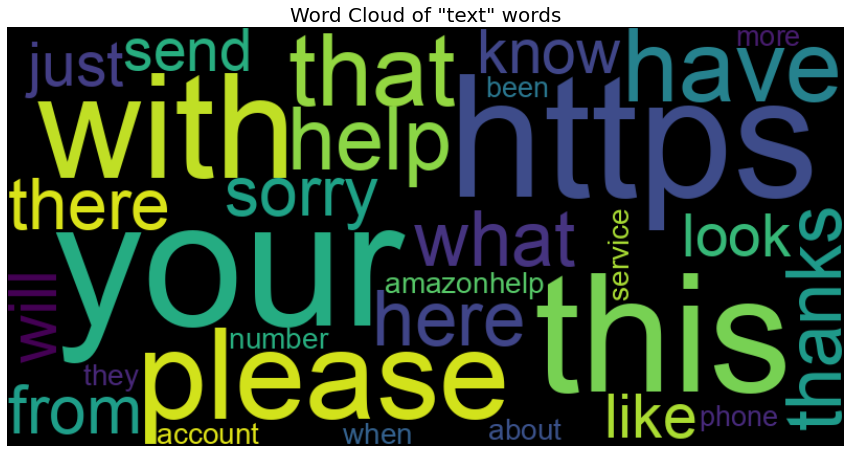

In [68]:
# Pathway for TrueType font 
font_path = '/usr/share/fonts/truetype/msttcorefonts/arial.ttf'

# Converting to dictionary for word cloud generation
text_word_count_dict = dict(top_text_words_df.select("text_word", "text_word_count").collect())

# Generating a word cloud using the specified font
wordcloud = WordCloud(width=800, height=400, background_color='Black', font_path=font_path).generate_from_frequencies(text_word_count_dict)

# Displaying the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of most Frequent "text" words', fontsize=20)
plt.show()

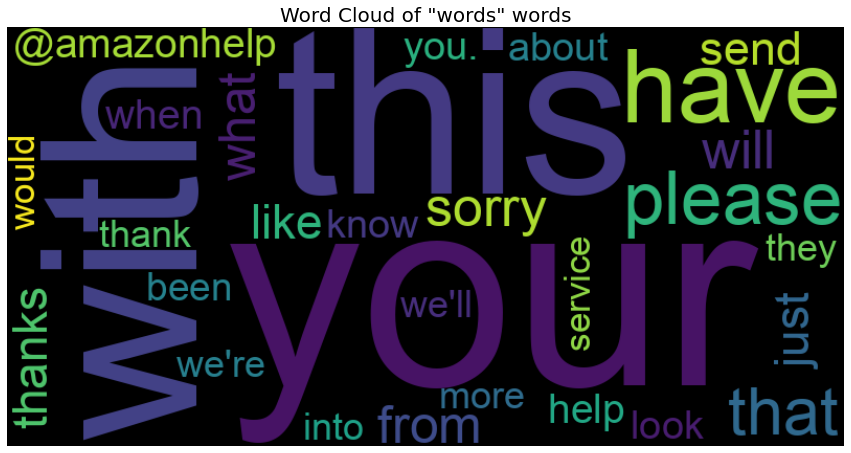

In [69]:
# Pathway for TrueType font 
font_path = '/usr/share/fonts/truetype/msttcorefonts/arial.ttf'

# Converting to dictionary for word cloud generation
text_word_count_dict = dict(top_words_words_df.select("words_word", "words_word_count").collect())

# Generating a word cloud using the specified font
wordcloud = WordCloud(width=800, height=400, background_color='black', font_path=font_path).generate_from_frequencies(text_word_count_dict)

# Displaying the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of most Frequent "words" words', fontsize=20)
plt.show()


### Term Frequency-Inverse Document Frequency (TF-IDF)

TF-IDF is a measure used in the fields of information retrieval (IR), machine learning (ML) and natural language processing (NLP). It quantify's the importance or relevance of strings such as words and phrases within a text amongst the whole text. TF measures the frequency of a term in a document, while IDF measures how unique or important a term is across the entire corpus of documents.

We will compute the TF-IDF scores for each tweet below following these steps:

    Tokenize the text into words (previously done for word count).
    Compute the Term Frequency (TF) for each word in each document.
    Compute the Inverse Document Frequency (IDF) for each word in the entire corpus.
    Compute the TF-IDF score for each word in each document by multiplying TF with IDF.

In [50]:
from pyspark.ml.feature import HashingTF, IDF
from pyspark.sql.functions import col

The term frequency is computed using the HashingTF transformer, which converts the tokenized words into a sparse vector representation of term frequencies into the 'rawTF' column. Ultimately calculating how often each word appears in each document.

In [51]:
# Computing Term Frequency (TF)
hashingTF = HashingTF(inputCol="words", outputCol="rawTF", numFeatures=10000)
tf_df = hashingTF.transform(df_cached)

Inverse document frequency is computed using an IDF estimator, which takes the term frequency vectors from 'rawTF' and calculates the IDF scores, storing them in the 'idf' column. IDF represents the importance of each word in distinguishing between tweets by measuring how often the word appears across all words. 

In [52]:
# Computing Inverse Document Frequency (IDF)
idf = IDF(inputCol="rawTF", outputCol="idf")
idfModel = idf.fit(tf_df)
tf_idf_df = idfModel.transform(tf_df)

24/04/19 16:47:06 WARN MemoryStore: Not enough space to cache rdd_42_8 in memory! (computed 1472.8 KiB so far)
24/04/19 16:47:06 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_42_9 in memory.
24/04/19 16:47:06 WARN MemoryStore: Not enough space to cache rdd_42_9 in memory! (computed 384.0 B so far)
24/04/19 16:47:06 WARN MemoryStore: Not enough space to cache rdd_42_10 in memory! (computed 1403.6 KiB so far)


In [81]:
tf_idf_scores_df = tf_idf_df.select("tweet_id", "words", "idf")

tf_idf_scores_df.show(truncate=50)

+--------+--------------------------------------------------+--------------------------------------------------+
|tweet_id|                                             words|                                               idf|
+--------+--------------------------------------------------+--------------------------------------------------+
|       1|[@115712, i, understand., i, would, like, to, a...|(10000,[4,488,943,1588,1756,2911,3330,4338,4347...|
|       2|[@sprintcare, and, how, do, you, propose, we, d...|(10000,[1009,1226,1588,2891,4338,8272,8643,9760...|
|       3|[@sprintcare, i, have, sent, several, private, ...|(10000,[815,1009,1299,1756,2891,3704,5209,6749,...|
|       4|[@115712, please, send, us, a, private, message...|(10000,[4,307,943,1263,1588,1789,2715,4133,4347...|
|       5|                            [@sprintcare, i, did.]|(10000,[1009,1756,5548],[5.29171847946699,1.460...|
|       6|[@115712, can, you, please, send, us, a, privat...|(10000,[943,1263,1756,2405,3030,413

In [ ]:
tf_idf_scores_df.printSchema()

In [80]:
tf_idf_scores_df = tf_idf_df.select("tweet_id", "words", "idf")

tf_idf_scores_df.show(truncate=False, n = 1)

+--------+-------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|tweet_id|words                                                                                                                                            |idf                                                                                                                                                                                                                                            

Each row represents a tweet, with the associated words and their corresponding IDF scores. The TF-IDF score indicates how important each word is within the context of each individual tweet compared to the entire corpus.

For example, in the first row, the word "assist" has an IDF score of approximately 4.16, suggesting that it is relatively important within that specific tweet. 

In [54]:
# # Creating a Pandas Dataframe for easier reading
# tf_idf_scores_pd_df = tf_idf_scores_df.toPandas()

# pd.option_context('display.max_colwidth', None)
# tf_idf_scores_pd_df.head()

TF-IDF has use cases in the field of information retrieval with a common example being search engines. As TF-IDF tells us about the relevant importance of a term to a document, search engines can use TF-IDF to help rank search results based on relevance, with results which are more relevant to the user having higher TF-IDF scores.

For text summarization & keyword extraction, TF-IDF can be used to determine that the words with the highest relevance are the most important. This can be used to help summarize articles more efficiently or to simply determine keywords for a document.

TF-IDF can be used to vectorize text into a format more agreeable for ML & NLP. However while it is a popular NLP algorithm it is not the only one out there with other options in Word2Vec, Bag-of-words and BERT. (Simha, 2021)

### Tweet Hashtag Analysis

At anytime, the data can be queried to identify the trending hashtags.

In [73]:
# Simple preprocessing and extracting hashtags
hashtags_df = df_uncached.selectExpr("text", "explode(split(text, ' ')) AS word") \
    .filter(col("word").startswith("#"))

# Counting hashtag occurrences
hashtag_counts_df = hashtags_df.groupBy("word").count().orderBy(desc("count"))

# Displaying the top20 hashtags
hashtag_counts_df.show()

24/04/19 17:44:26 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_42_31 in memory.
24/04/19 17:44:26 WARN MemoryStore: Not enough space to cache rdd_42_31 in memory! (computed 384.0 B so far)
24/04/19 17:44:32 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_42_127 in memory.
24/04/19 17:44:32 WARN MemoryStore: Not enough space to cache rdd_42_127 in memory! (computed 384.0 B so far)


+----------------+-----+
|            word|count|
+----------------+-----+
|               #|10290|
|              #,| 1575|
|           #fail| 1464|
|         #AATeam| 1159|
|         #hppsdr| 1136|
|        #iPhoneX| 1078|
|         #Amazon| 1065|
|           #help| 1021|
|          #iOS11|  986|
|              #?|  986|
|     #azTechHelp|  959|
|              #.|  940|
|#CustomerService|  910|
|        #ijkhelp|  893|
|          #ios11|  690|
|    #lovethebear|  685|
|          #apple|  672|
|         #hpprnt|  664|
|   #disappointed|  662|
|  #KevinandKatie|  657|
+----------------+-----+
only showing top 20 rows



At a glance, Apple and iphones feature high on the hashtag list. CustomerService features but not as high as expected, given that it is a customer service dataset.

In [76]:
# Simple preprocessing and extracting hashtags
hashtags_df2 = df_uncached.selectExpr("words", "explode(split(text, ' ')) AS word") \
    .filter(col("word").startswith("#"))

# Counting hashtag occurrences
hashtag_counts_df2 = hashtags_df2.groupBy("word").count().orderBy(desc("count"))

# Displaying the top20 hashtags
hashtag_counts_df2.show()

24/04/19 17:58:13 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_42_62 in memory.
24/04/19 17:58:13 WARN MemoryStore: Not enough space to cache rdd_42_62 in memory! (computed 384.0 B so far)
24/04/19 17:58:17 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_42_143 in memory.
24/04/19 17:58:17 WARN MemoryStore: Not enough space to cache rdd_42_143 in memory! (computed 384.0 B so far)
24/04/19 17:58:18 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_42_152 in memory.
24/04/19 17:58:18 WARN MemoryStore: Not enough space to cache rdd_42_152 in memory! (computed 384.0 B so far)
24/04/19 17:58:19 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_42_173 in memory.
24/04/19 17:58:19 WARN MemoryStore: Not enough space to cache rdd_42_173 in memory! (computed 384.0 B so far)


+----------------+-----+
|            word|count|
+----------------+-----+
|               #|10290|
|              #,| 1575|
|           #fail| 1464|
|         #AATeam| 1159|
|         #hppsdr| 1136|
|        #iPhoneX| 1078|
|         #Amazon| 1065|
|           #help| 1021|
|          #iOS11|  986|
|              #?|  986|
|     #azTechHelp|  959|
|              #.|  940|
|#CustomerService|  910|
|        #ijkhelp|  893|
|          #ios11|  690|
|    #lovethebear|  685|
|          #apple|  672|
|         #hpprnt|  664|
|   #disappointed|  662|
|  #KevinandKatie|  657|
+----------------+-----+
only showing top 20 rows



### Reading from HDFS

In [1]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, LongType

# Defining the HDFS path 
path = "/user1/twitter_customer_support_indexed"

newSchema2 = StructType([\
                       StructField("tweet_id", IntegerType(), True),
                       StructField("author_id", StringType(), True),
                       StructField("inbound", StringType(), True),
                       StructField("created_at", TimestampType(), True),
                       StructField("text", StringType(), True),
                       StructField("response_tweet_id", IntegerType(), True),
                       StructField("in_response_to_tweet_id", IntegerType(), True),
                       StructField("index", LongType(), True)
                       ])

df_indexed = spark.read.format("csv")\
    .schema (newSchema2)\
    .option("inferSchema", "True")\
    .option("path", path)\
    .load()

df_indexed.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- index: long (nullable = true)



### Tweet Emoji Analysis

In [83]:
#pip install demoji

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType
import demoji  # For emoji extraction (install using pip install demoji)

# Filtering the data to include only relevant columns and tweets
filtered_df = df_indexed.select("text", "inbound").cache()

# Defining a function to count emojis in a text
def count_emojis(text):
    return len(demoji.findall_list(text))

# Registering a UDF (User Defined Function)
count_emojis_udf = udf(count_emojis, IntegerType())

# Preprocessing the text and extracting emojis
df_processed = filtered_df.withColumn("emoji_count", count_emojis_udf(col("text")))

# Unpersisting the cached DataFrame to release memory
filtered_df.unpersist()

# Separating inbound and outbound tweets
df_inbound = df_processed.filter(df_processed["inbound"] == True)
df_outbound = df_processed.filter(df_processed["inbound"] == False)

# Counting emojis for inbound and outbound tweets
emoji_counts_inbound = df_inbound.groupBy("emoji_count").count().orderBy("count", ascending=False)
emoji_counts_outbound = df_outbound.groupBy("emoji_count").count().orderBy("count", ascending=False)

# Comparing inbound vs outbound emojis
print("Emoji counts in inbound tweets:\n")
emoji_counts_inbound.show()

print("Emoji counts in outbound tweets:\n")
emoji_counts_outbound.show()

24/04/19 21:29:18 WARN CacheManager: Asked to cache already cached data.


Emoji counts in inbound tweets:


ERROR:root:KeyboardInterrupt while sending command.][Stage 2:>    (0 + 0) / 4]
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [3]:
from pyspark.sql.functions import col, udf, desc
from pyspark.sql.types import IntegerType
import demoji

# Filter data early to include only relevant columns and tweets
filtered_df = df_indexed.select("text", "inbound").cache()

# Define a function to count emojis in a text
def count_emojis(text):
    return len(demoji.findall_list(text))

# Register the UDF (User Defined Function)
count_emojis_udf = udf(count_emojis, IntegerType())

# Apply UDF to count emojis and add a new column 'emoji_count'
df_with_emojis = filtered_df.withColumn("emoji_count", count_emojis_udf(col("text")))

# Unpersist the cached DataFrame to release memory
filtered_df.unpersist()

# Filter inbound and outbound tweets
df_inbound = df_with_emojis.filter(col("inbound") == "True")
df_outbound = df_with_emojis.filter(col("inbound") == "False")

# Aggregate emoji counts for inbound and outbound tweets
inbound_emoji_counts = df_inbound.groupBy("emoji_count").count().orderBy(desc("count"))
outbound_emoji_counts = df_outbound.groupBy("emoji_count").count().orderBy(desc("count"))

# Collect the top emoji counts for inbound and outbound tweets
top_inbound_emojis = inbound_emoji_counts.take(10)
top_outbound_emojis = outbound_emoji_counts.take(10)

# Print the top emoji counts for inbound tweets
print("Top Emoji Counts for Inbound Tweets:\n")
for row in top_inbound_emojis:
    print(row)

# Print the top emoji counts for outbound tweets
print("\nTop Emoji Counts for Outbound Tweets:\n")
for row in top_outbound_emojis:
    print(row)
    


Top Emoji Counts for Inbound Tweets:
Row(emoji_count=0, count=1394673)
Row(emoji_count=1, count=96110)
Row(emoji_count=2, count=24822)
Row(emoji_count=3, count=13281)
Row(emoji_count=4, count=4548)
Row(emoji_count=5, count=1839)
Row(emoji_count=6, count=1016)
Row(emoji_count=7, count=471)
Row(emoji_count=8, count=321)
Row(emoji_count=9, count=161)

Top Emoji Counts for Outbound Tweets:
Row(emoji_count=0, count=1227285)
Row(emoji_count=1, count=38115)
Row(emoji_count=2, count=6132)
Row(emoji_count=3, count=1873)
Row(emoji_count=4, count=342)
Row(emoji_count=5, count=111)
Row(emoji_count=6, count=48)
Row(emoji_count=7, count=10)
Row(emoji_count=8, count=6)
Row(emoji_count=9, count=4)


In [88]:
#pip install spacy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 4.3 MB/s eta 0:00:003 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 2.1 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.9/407.9 kB 4.8 MB/s eta 0:00:000:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 1.3 MB/s eta 0:00:0023.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 5.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 8.5 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql.functions import col
import spacy
from collections import Counter

# Filter data early to include only relevant columns and tweets
filtered_df = df_indexed.select("text", "inbound")

# Filter inbound and outbound tweets
df_inbound = filtered_df.filter(col("inbound") == "True")
df_outbound = filtered_df.filter(col("inbound") == "False")

# Load the SpaCy model with emoji recognition
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner"])

# Function to count emojis in text
def count_emojis(text):
    doc = nlp(text)
    emojis = [token.text for token in doc if token._.is_emoji]
    return emojis

# Apply the function to count emojis in inbound tweets
inbound_emojis = df_inbound.rdd.flatMap(lambda row: count_emojis(row["text"]))

# Apply the function to count emojis in outbound tweets
outbound_emojis = df_outbound.rdd.flatMap(lambda row: count_emojis(row["text"]))

# Aggregate emoji counts for inbound tweets
inbound_emoji_counts = inbound_emojis.map(lambda emoji: (emoji, 1)).reduceByKey(lambda x, y: x + y)

# Aggregate emoji counts for outbound tweets
outbound_emoji_counts = outbound_emojis.map(lambda emoji: (emoji, 1)).reduceByKey(lambda x, y: x + y)

# Collect the top emojis for inbound tweets
top_inbound_emojis = inbound_emoji_counts.takeOrdered(10, key=lambda x: -x[1])

# Collect the top emojis for outbound tweets
top_outbound_emojis = outbound_emoji_counts.takeOrdered(10, key=lambda x: -x[1])

# Print the top emojis for inbound tweets
print("Top Emojis in query tweets by Customers:")
for emoji, count in top_inbound_emojis:
    print(emoji, count)

# Print the top emojis for outbound tweets
print("\nTop Emojis in responses by Companies:")
for emoji, count in top_outbound_emojis:
    print(emoji, count)

24/04/19 22:12:11 WARN Utils: Suppressing exception in finally: Java heap space
java.lang.OutOfMemoryError: Java heap space
	at java.nio.HeapByteBuffer.<init>(HeapByteBuffer.java:57)
	at java.nio.ByteBuffer.allocate(ByteBuffer.java:335)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$1(TorrentBroadcast.scala:353)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$1$adapted(TorrentBroadcast.scala:353)
	at org.apache.spark.broadcast.TorrentBroadcast$$$Lambda$2172/1852665077.apply(Unknown Source)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.allocateNewChunkIfNeeded(ChunkedByteBufferOutputStream.scala:87)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.write(ChunkedByteBufferOutputStream.scala:75)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:225)
	at net.jpountz.lz4.LZ4BlockOutputStream.finish(LZ4BlockOutputStream.java:257)
	at net.jpountz.lz4.LZ4BlockOutputStream.close(LZ4BlockO

Py4JJavaError: An error occurred while calling o16.broadcast.
: java.lang.OutOfMemoryError: Java heap space
	at java.nio.HeapByteBuffer.<init>(HeapByteBuffer.java:57)
	at java.nio.ByteBuffer.allocate(ByteBuffer.java:335)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$1(TorrentBroadcast.scala:353)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$1$adapted(TorrentBroadcast.scala:353)
	at org.apache.spark.broadcast.TorrentBroadcast$$$Lambda$2172/1852665077.apply(Unknown Source)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.allocateNewChunkIfNeeded(ChunkedByteBufferOutputStream.scala:87)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.write(ChunkedByteBufferOutputStream.scala:75)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:225)
	at net.jpountz.lz4.LZ4BlockOutputStream.write(LZ4BlockOutputStream.java:178)
	at java.io.ObjectOutputStream$BlockDataOutputStream.write(ObjectOutputStream.java:1853)
	at java.io.ObjectOutputStream.write(ObjectOutputStream.java:709)
	at org.apache.spark.util.Utils$.$anonfun$copyStream$1(Utils.scala:371)
	at org.apache.spark.util.Utils$$$Lambda$2292/1975470858.apply$mcJ$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.util.Utils$.copyStream(Utils.scala:378)
	at org.apache.spark.api.python.PythonBroadcast.$anonfun$writeObject$1(PythonRDD.scala:770)
	at org.apache.spark.api.python.PythonBroadcast$$Lambda$2317/1039137457.apply$mcJ$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1495)
	at org.apache.spark.api.python.PythonBroadcast.writeObject(PythonRDD.scala:766)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeWriteObject(ObjectStreamClass.java:1154)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1496)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:348)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:46)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$4(TorrentBroadcast.scala:358)


In [2]:
from pyspark.sql.functions import col

import spacy

from collections import Counter

# Filter data early to include only relevant columns and tweets
filtered_df = df_indexed.select("text", "inbound")

# Filter inbound and outbound tweets
df_inbound = filtered_df.filter(col("inbound") == "True")
df_outbound = filtered_df.filter(col("inbound") == "False")

# Load the SpaCy model with emoji recognition
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner"])

# Function to count emojis in text
def count_emojis(text):
    doc = nlp(text)
    emojis = [token.text for token in doc if token._.is_emoji]
    return emojis

# Apply the function to count emojis in inbound tweets
inbound_emojis = df_inbound.rdd.flatMap(lambda row: count_emojis(row["text"]))

# Apply the function to count emojis in outbound tweets
outbound_emojis = df_outbound.rdd.flatMap(lambda row: count_emojis(row["text"]))

# Aggregate emoji counts for inbound tweets
inbound_emoji_counts = inbound_emojis.map(lambda emoji: (emoji, 1)).reduceByKey(lambda x, y: x + y)

# Aggregate emoji counts for outbound tweets
outbound_emoji_counts = outbound_emojis.map(lambda emoji: (emoji, 1)).reduceByKey(lambda x, y: x + y)

# Collect the top emojis for inbound tweets
top_inbound_emojis = inbound_emoji_counts.takeOrdered(10, key=lambda x: -x[1])

# Collect the top emojis for outbound tweets
top_outbound_emojis = outbound_emoji_counts.takeOrdered(10, key=lambda x: -x[1])

# Print the top emojis for inbound tweets
print("Top Emojis in query tweets by Customers:")
for emoji, count in top_inbound_emojis:
    print(emoji, count)

# Print the top emojis for outbound tweets
print("\nTop Emojis in responses by Companies:")
for emoji, count in top_outbound_emojis:
    print(emoji, count)

24/04/19 22:17:48 WARN Utils: Suppressing exception in finally: Java heap space
java.lang.OutOfMemoryError: Java heap space
	at java.nio.HeapByteBuffer.<init>(HeapByteBuffer.java:57)
	at java.nio.ByteBuffer.allocate(ByteBuffer.java:335)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$1(TorrentBroadcast.scala:353)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$1$adapted(TorrentBroadcast.scala:353)
	at org.apache.spark.broadcast.TorrentBroadcast$$$Lambda$2170/289045122.apply(Unknown Source)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.allocateNewChunkIfNeeded(ChunkedByteBufferOutputStream.scala:87)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.write(ChunkedByteBufferOutputStream.scala:75)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:225)
	at net.jpountz.lz4.LZ4BlockOutputStream.finish(LZ4BlockOutputStream.java:257)
	at net.jpountz.lz4.LZ4BlockOutputStream.close(LZ4BlockOu

Py4JJavaError: An error occurred while calling o16.broadcast.
: java.lang.OutOfMemoryError: Java heap space
	at java.nio.HeapByteBuffer.<init>(HeapByteBuffer.java:57)
	at java.nio.ByteBuffer.allocate(ByteBuffer.java:335)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$1(TorrentBroadcast.scala:353)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$1$adapted(TorrentBroadcast.scala:353)
	at org.apache.spark.broadcast.TorrentBroadcast$$$Lambda$2170/289045122.apply(Unknown Source)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.allocateNewChunkIfNeeded(ChunkedByteBufferOutputStream.scala:87)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.write(ChunkedByteBufferOutputStream.scala:75)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:225)
	at net.jpountz.lz4.LZ4BlockOutputStream.write(LZ4BlockOutputStream.java:178)
	at java.io.ObjectOutputStream$BlockDataOutputStream.write(ObjectOutputStream.java:1853)
	at java.io.ObjectOutputStream.write(ObjectOutputStream.java:709)
	at org.apache.spark.util.Utils$.$anonfun$copyStream$1(Utils.scala:371)
	at org.apache.spark.util.Utils$$$Lambda$2290/1660198365.apply$mcJ$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.util.Utils$.copyStream(Utils.scala:378)
	at org.apache.spark.api.python.PythonBroadcast.$anonfun$writeObject$1(PythonRDD.scala:770)
	at org.apache.spark.api.python.PythonBroadcast$$Lambda$2315/383633974.apply$mcJ$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1495)
	at org.apache.spark.api.python.PythonBroadcast.writeObject(PythonRDD.scala:766)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeWriteObject(ObjectStreamClass.java:1154)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1496)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:348)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:46)
	at org.apache.spark.broadcast.TorrentBroadcast$.$anonfun$blockifyObject$4(TorrentBroadcast.scala:358)


### Defining a new Spark session with specific memory configurations

In [1]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

if 'spark' in locals():
    spark.stop()

# Create a SparkConf object
conf = SparkConf()

# Set Spark properties
conf.set("spark.executor.memory", "16g")
conf.set("spark.driver.memory", "16g")

# Create a SparkSession
spark = SparkSession.builder.config(conf=conf).getOrCreate()

### Reading from HDFS

In [2]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, LongType

# Defining the HDFS path 
path = "/user1/twitter_customer_support_indexed"

newSchema2 = StructType([\
                       StructField("tweet_id", IntegerType(), True),
                       StructField("author_id", StringType(), True),
                       StructField("inbound", StringType(), True),
                       StructField("created_at", TimestampType(), True),
                       StructField("text", StringType(), True),
                       StructField("response_tweet_id", IntegerType(), True),
                       StructField("in_response_to_tweet_id", IntegerType(), True),
                       StructField("index", LongType(), True)
                       ])

df_indexed = spark.read.format("csv")\
    .schema (newSchema2)\
    .option("inferSchema", "True")\
    .option("path", path)\
    .load()

df_indexed.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- index: long (nullable = true)



### Loading Dependencies

In [3]:
#pip install vaderSentiment

In [4]:
#pip install nltk

In [5]:
from pyspark.sql.functions import col, udf, explode, desc, lower, regexp_replace
from pyspark.sql.types import IntegerType, StringType, FloatType
from pyspark.ml.feature import StopWordsRemover, Tokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import re

import nltk
#nltk.download('wordnet')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Preprocessing for Senitment Analysis

In [6]:
df_indexed = df_indexed.repartition(4)

In [7]:
# Filtering out rows with null values in the text column
filtered_df = df_indexed.select("text").filter(col("text").isNotNull()).cache()

In [8]:
# Tokenizing the text column
tokenizer = Tokenizer(inputCol="text", outputCol="words")
filtered_df = tokenizer.transform(filtered_df)

In [9]:
# Preprocessing: Lowercase the text column
filtered_df = filtered_df.withColumn("text_lower", lower(col("text")))

In [10]:
# Preprocessing: Removing special characters, punctuation marks, and non-alphanumeric characters
filtered_df = filtered_df.withColumn("text_cleaned", regexp_replace(col("text_lower"), "[^a-zA-Z0-9\\s]", ""))

In [11]:
# Preprocessing: Removing stopwords
stopwords = StopWordsRemover.loadDefaultStopWords("english")
stopwords_remover = StopWordsRemover(inputCol="words", outputCol="text_without_stopwords", stopWords=stopwords)
filtered_df = stopwords_remover.transform(filtered_df)

In [12]:
# Defining a function to remove URLs and mentions
def remove_urls_mentions(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    return text

In [13]:
# Defining a UDFs
remove_urls_mentions_udf = udf(remove_urls_mentions, StringType())

In [14]:
# Defining a function to lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [15]:
# Define UDFs for preprocessing functions
lemmatize_text_udf = udf(lemmatize_text, StringType())

In [16]:
# Applying the preprocessing steps
df_preprocessed = filtered_df.withColumn("text_cleaned", remove_urls_mentions_udf(col("text"))) \
                              .withColumn("text_cleaned", regexp_replace(col("text_cleaned"), "http\S+", "")) \
                              .withColumn("text_cleaned", lemmatize_text_udf(col("text_cleaned")))

In [17]:
# Unpersisting the DataFrame after processing as it's no longer needed
filtered_df.unpersist()
print(f"Is filtered_df dataframe cached? {filtered_df.is_cached}")
df_preprocessed.cache()
print(f"Is df_preprocessed dataframe cached? {df_preprocessed.is_cached}")

Is filtered_df dataframe cached? False
Is df_preprocessed dataframe cached? True


In [18]:
# Sentiment analysis object
analyzer = SentimentIntensityAnalyzer()

# Defining a function to compute sentiment score
def compute_sentiment_score(text):
    sentiment_score = analyzer.polarity_scores(text)["compound"]
    return sentiment_score

# Registering the User Defined Function
compute_sentiment_score_udf = udf(compute_sentiment_score, FloatType())

In [19]:
# Applying the UDF to compute sentiment score and adding a new column 'sentiment_score'
df_with_sentiment = df_preprocessed.withColumn("sentiment_score", compute_sentiment_score_udf(col("text_without_stopwords")))


In [20]:
df_preprocessed.unpersist()
print(f"Is df_preprocessed dataframe cached? {df_preprocessed.is_cached}")
print(f"Is df_with_sentiment dataframe cached? {df_with_sentiment.is_cached}")

Is df_preprocessed dataframe cached? False
Is df_with_sentiment dataframe cached? False


In [21]:
# Categorizing sentiment based on sentiment score
def categorize_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"
    
# UDF for categorizing sentiment
categorize_sentiment_udf = udf(categorize_sentiment, StringType())

In [22]:
# Cacheing the DataFrame after preprocessing
df_with_sentiment.cache()

DataFrame[text: string, words: array<string>, text_lower: string, text_cleaned: string, text_without_stopwords: array<string>, sentiment_score: float]

In [23]:
# Applying the UDF to categorize sentiment and adding a new column 'sentiment'
df_with_sentiment = df_with_sentiment.withColumn("sentiment", categorize_sentiment_udf(col("sentiment_score")))

In [24]:
# Joining the sentiment results back to the original DataFrame containing all columns
df_with_sentiment_full = df_indexed.join(df_with_sentiment, on="text", how="inner")

df_with_sentiment.unpersist()

DataFrame[text: string, words: array<string>, text_lower: string, text_cleaned: string, text_without_stopwords: array<string>, sentiment_score: float, sentiment: string]

In [25]:
# Displaying the dataframe with sentiment scores and categories
df_with_sentiment_full.printSchema()

root
 |-- text: string (nullable = true)
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- index: long (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- text_lower: string (nullable = true)
 |-- text_cleaned: string (nullable = true)
 |-- text_without_stopwords: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- sentiment_score: float (nullable = true)
 |-- sentiment: string (nullable = true)



In [26]:
columns_to_drop = ['words', 'text_lower', 'text_without_stopwords', 'element', 'response_tweet_id', 'in_response_to_tweet_id', 'text_cleaned', 'sentiment_score', 'index']

# , 'response_tweet_id', 'in_response_to_tweet_id', 'text_cleaned', 'sentiment_score', 'created_at', 'index'
# Removing columns
refined_df = df_with_sentiment_full.drop(*columns_to_drop)

# Checking the schema to confirm that the columns are dropped
refined_df.printSchema()

root
 |-- text: string (nullable = true)
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- sentiment: string (nullable = true)



In [27]:
refined_df = refined_df.repartition(4)

In [28]:
#refined_df.select('sentiment_score', 'sentiment').show(truncate=False)

### Checking Memory Configurations

In [26]:
# Getting the current value of spark.executor.memory and spark.driver.memory
executor_memory = conf.get("spark.executor.memory")
driver_memory = conf.get("spark.driver.memory")

# Viweing the memory settings
print("Current Spark Executor Memory:", executor_memory)
print("Current Spark Driver Memory:", driver_memory)

Current Spark Executor Memory: 16g
Current Spark Driver Memory: 16g


### Writing to HDFS

#### First option using partitioning and parquet file format

In [25]:
# Partitioning by year and month
partitioned_df = refined_df.write \
                           .partitionBy("author_id") \
                           .format("parquet") \
                           .save("/user1/twitter_customer_support_sentiment_partitioned")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
24/04/22 16:16:54 WARN MemoryStore: Not enough space to cache rdd_26_1 in memory! (computed 68.0 MiB so far)
24/04/22 16:16:54 WARN BlockManager: Persisting block rdd_26_1 to disk instead.
24/04/22 16:16:55 WARN MemoryStore: Not enough space to cache rdd_26_0 in memory! (computed 68.0 MiB so far)
24/04/22 16:16:55 WARN BlockManager: Persisting block rdd_26_0 to disk instead.
24/04/22 16:17:35 WARN BlockManager: Block rdd_26_1 could not be removed as it was not found on disk or in memory
24/04/22 16:17:35 ERROR Ex

24/04/22 16:17:36 WARN BlockManager: Putting block rdd_26_0 failed due to exception org.apache.spark.TaskKilledException.
24/04/22 16:17:36 WARN BlockManager: Block rdd_26_0 could not be removed as it was not found on disk or in memory
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_11493/2402040732.py", line 5, in <module>
    .save("/user1/twitter_customer_support_sentiment_partitioned")
  File "/usr/local/spark/python/pyspark/sql/readwriter.py", line 1398, in save
    self._jwrite.save(path)
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1322, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/errors/exceptions/captured.py", line 169, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-

ConnectionRefusedError: [Errno 111] Connection refused

In [27]:
from pyspark.sql.functions import year, month

# Partitioning by year and month
partitioned_df = refined_df.withColumn("year", year("created_at")) \
                           .withColumn("month", month("created_at")) \
                           .write \
                           .partitionBy("year", "month") \
                           .format("parquet").mode("overwrite") \
                           .save("/user1/twitter_customer_support_sentiment_partitioned")


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
24/04/22 17:23:58 WARN MemoryStore: Not enough space to cache rdd_26_1 in memory! (computed 68.0 MiB so far)
24/04/22 17:23:58 WARN BlockManager: Persisting block rdd_26_1 to disk instead.
24/04/22 17:23:59 WARN MemoryStore: Not enough space to cache rdd_26_0 in memory! (computed 68.0 MiB so far)
24/04/22 17:23:59 WARN BlockManager: Persisting block rdd_26_0 to disk instead.
24/04/22 17:25:04 WARN TaskMemoryManager: Failed to allocate a page (8388608 bytes), try again.
24/04/22 17:25:05 WARN TaskMemoryManager: Fa

ConnectionRefusedError: [Errno 111] Connection refused

In [1]:
spark.stop()

#### Second option using CSV without partitioning

In [25]:
# path = "/user1/twitter_customer_support_sentiment"

# # Saving the dataframe as a csv
# refined_df.write\
# .format("csv").mode("overwrite")\
# .option("path", path)\
# .save()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
24/04/22 15:27:22 WARN MemoryStore: Not enough space to cache rdd_26_0 in memory! (computed 68.0 MiB so far)
24/04/22 15:27:22 WARN BlockManager: Persisting block rdd_26_0 to disk instead.
24/04/22 15:27:22 WARN MemoryStore: Not enough space to cache rdd_26_1 in memory! (computed 68.0 MiB so far)
24/04/22 15:27:22 WARN BlockManager: Persisting block rdd_26_1 to disk instead.
24/04/22 15:28:07 WARN BlockManager: Block rdd_26_0 could not be removed as it was not found on disk or in memory
24/04/22 15:28:07 ERROR Ex

24/04/22 15:28:08 WARN BlockManager: Putting block rdd_26_1 failed due to exception org.apache.spark.TaskKilledException.
24/04/22 15:28:08 WARN BlockManager: Block rdd_26_1 could not be removed as it was not found on disk or in memory
24/04/22 15:28:09 ERROR Inbox: Ignoring error
java.util.concurrent.RejectedExecutionException: Task org.apache.spark.executor.Executor$TaskRunner@46649584 rejected from java.util.concurrent.ThreadPoolExecutor@78de5a52[Shutting down, pool size = 2, active threads = 2, queued tasks = 0, completed tasks = 10]
	at java.util.concurrent.ThreadPoolExecutor$AbortPolicy.rejectedExecution(ThreadPoolExecutor.java:2063)
	at java.util.concurrent.ThreadPoolExecutor.reject(ThreadPoolExecutor.java:830)
	at java.util.concurrent.ThreadPoolExecutor.execute(ThreadPoolExecutor.java:1379)
	at org.apache.spark.executor.Executor.launchTask(Executor.scala:311)
	at org.apache.spark.scheduler.local.LocalEndpoint.$anonfun$reviveOffers$1(LocalSchedulerBackend.scala:93)
	at org.apach

ConnectionRefusedError: [Errno 111] Connection refused

### Write to HBase

In [ ]:
# refined_df.write \
#     .format("org.apache.spark.sql.execution.datasources.hbase") \
#     .option("hbase.table", "your_hbase_table") \
#     .option("hbase.columns.mapping", "cf:col1,cf:col2") \
#     .save()

In [ ]:
# refined_df.write.format("org.apache.hadoop.hbase.spark") \
#                            .option("catalog", hbase_catalog) \
#                            .option("newtable", 5) \
#                            .save()

### Reading From HDFS

#### Partitioned parquest file

In [25]:
# Specify the path to the parent directory containing the partitioned data
partitioned_path = "/user1/twitter_customer_support_sentiment_partitioned"

# Read the partitioned data into a DataFrame
partitioned_df = spark.read.parquet(partitioned_path)

# Show the schema of the loaded DataFrame
partitioned_df.printSchema()

# Show the first few rows of the DataFrame
partitioned_df.show()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- index: long (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)



+--------+------------+-------+-------------------+-----------------------------+-----------------+-----------------------+-------+----+-----+
|tweet_id|   author_id|inbound|         created_at|                         text|response_tweet_id|in_response_to_tweet_id|  index|year|month|
+--------+------------+-------+-------------------+-----------------------------+-----------------+-----------------------+-------+----+-----+
| 2699306|      758346|   True|2017-11-19 20:07:19|         @AirAsiaSupport h...|             null|                2699308|2529642|2017|   11|
| 1406458|       Delta|  False|2017-11-01 22:01:29|         @446910 Hi Mario,...|             null|                1406457|1275786|2017|   11|
| 2966031|comcastcares|  False|2017-11-29 22:29:35|         @330284 Hello. Th...|             null|                2966032|2790022|2017|   11|
| 1404332|      446491|   True|2017-11-10 23:33:33|         Tmobile store in ...|          1404331|                   null|1273879|2017|   11|

#### CSV file

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, LongType, FloatType

# Defining the HDFS path 
path = "/user1/twitter_customer_support_sentiment"

newSchema3 = StructType([\
                       StructField("tweet_id", IntegerType(), True),
                       StructField("author_id", StringType(), True),
                       StructField("inbound", StringType(), True),
                       StructField("created_at", TimestampType(), True),
                       StructField("text", StringType(), True),
                       StructField("response_tweet_id", IntegerType(), True),
                       StructField("in_response_to_tweet_id", IntegerType(), True),
                       StructField("index", LongType(), True),
                       StructField("text_cleaned", StringType(), True),
                       StructField("sentiment_score", FloatType(), True),
                       StructField("sentiment", StringType(), True)
                       ])

df = spark.read.format("csv")\
    .schema (newSchema3)\
    .option("inferSchema", "True")\
    .option("path", path)\
    .load()

df.printSchema()

### Inbound vs Outbound Tweet Analysis

In [27]:
# Create temporary views for DataFrame
refined_df.createOrReplaceTempView("tweet_sentiments_view")

In [28]:
# Filter inbound and outbound tweets using SQL
df_inbound = spark.sql("SELECT * FROM tweet_sentiments_view WHERE inbound = 'True'")
df_outbound = spark.sql("SELECT * FROM tweet_sentiments_view WHERE inbound = 'False'")

In [29]:
# Create temporary views for filtered DataFrames
df_inbound.createOrReplaceTempView("df_inbound")
df_outbound.createOrReplaceTempView("df_outbound")

In [30]:
# Aggregate sentiment counts for inbound and outbound tweets using SQL
sentiment_counts_inbound = spark.sql("SELECT sentiment, COUNT(*) AS count FROM df_inbound GROUP BY sentiment ORDER BY count DESC")
sentiment_counts_outbound = spark.sql("SELECT sentiment, COUNT(*) AS count FROM df_outbound GROUP BY sentiment ORDER BY count DESC")

In [31]:
# Show the sentiment counts for inbound and outbound tweets
print("Sentiment Counts for Inbound Tweets:")
sentiment_counts_inbound.show()

Sentiment Counts for Inbound Tweets:


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
24/04/22 17:36:43 WARN MemoryStore: Not enough space to cache rdd_26_1 in memory! (computed 68.0 MiB so far)
24/04/22 17:36:43 WARN BlockManager: Persisting block rdd_26_1 to disk instead.
24/04/22 17:36:45 WARN MemoryStore: Not enough space to cache rdd_26_0 in memory! (computed 68.0 MiB so far)
24/04/22 17:36:45 WARN BlockManager: Persisting block rdd_26_0 to disk instead.
24/04/22 17:40:07 WARN NettyRpcEnv: Ignored message: HeartbeatResponse(false) 4]
24/04/22 17:40:07 WARN TaskMemoryManager: Failed to allocat

24/04/22 17:43:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

24/04/22 17:43:43 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.util.c

	at org.apache.spark.rpc.netty.NettyRpcEnv.$anonfun$asyncSetupEndpointRefByURI$1$adapted(NettyRpcEnv.scala:144)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:41)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at org.apache.spark.util.ThreadUtils$$anon$1.execute(ThreadUtils.scala:99)
	at scala.concurrent.impl.ExecutionContextImpl$$anon$4.execute(ExecutionContextImpl.scala:138)
	at scala.concurrent.impl.CallbackRunnable.executeWithValue(Promise.scala:72)
	at scala.concurrent.impl.Promise$DefaultPromise.dispatchOrAddCallback(Promise.scala:316)
	at scala.concurrent.impl.Promise$DefaultPromise.onComplete(Promise.scala:307)
	at scala.concurrent.impl.Promise.transformWith(Promise.scala:40)
	at scala.concurrent.impl.Promise.transformWith$(Promise.scala:38)
	at scala.concurrent.impl.Promise$DefaultPromise.transformWith(Promise.scala:187)
	at scala.concurrent.Future.flatMap(Future.scala

	at java.util.concurrent.FutureTask.runAndReset(FutureTask.java:308)
	at java.util.concurrent.ScheduledThreadPoolExecutor$ScheduledFutureTask.access$301(ScheduledThreadPoolExecutor.java:180)
	at java.util.concurrent.ScheduledThreadPoolExecutor$ScheduledFutureTask.run(ScheduledThreadPoolExecutor.java:294)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint

24/04/22 17:43:45 WARN TaskSetManager: Lost task 1.0 in stage 2.0 (TID 11) (10.0.2.15 executor driver): java.lang.OutOfMemoryError: Java heap space
	at java.nio.HeapByteBuffer.<init>(HeapByteBuffer.java:57)
	at java.nio.ByteBuffer.allocate(ByteBuffer.java:335)
	at org.apache.spark.sql.execution.columnar.ColumnBuilder$.ensureFreeSpace(ColumnBuilder.scala:161)
	at org.apache.spark.sql.execution.columnar.BasicColumnBuilder.appendFrom(ColumnBuilder.scala:72)
	at org.apache.spark.sql.execution.columnar.ComplexColumnBuilder.org$apache$spark$sql$execution$columnar$NullableColumnBuilder$$super$appendFrom(ColumnBuilder.scala:92)
	at org.apache.spark.sql.execution.columnar.NullableColumnBuilder.appendFrom(NullableColumnBuilder.scala:61)
	at org.apache.spark.sql.execution.columnar.NullableColumnBuilder.appendFrom$(NullableColumnBuilder.scala:54)
	at org.apache.spark.sql.execution.columnar.ComplexColumnBuilder.appendFrom(ColumnBuilder.scala:92)
	at org.apache.spark.sql.execution.columnar.DefaultCa

Py4JError: An error occurred while calling z:py4j.reflection.TypeUtil.isInstanceOf

In [ ]:
print("Sentiment Counts for Outbound Tweets:")
sentiment_counts_outbound.show()

### Second approach without temp views

In [29]:
from pyspark.sql import functions as F

# Filter inbound and outbound tweets and cache the DataFrame
df_filtered = refined_df.filter((F.col("inbound") == "True") | (F.col("inbound") == "False")).cache()

# Aggregate sentiment counts for inbound and outbound tweets
sentiment_counts = df_filtered.groupBy("inbound", "sentiment").count()

# Split aggregated DataFrame into inbound and outbound DataFrames
sentiment_counts_inbound = sentiment_counts.filter(sentiment_counts["inbound"] == "True").orderBy(F.desc("count"))
sentiment_counts_outbound = sentiment_counts.filter(sentiment_counts["inbound"] == "False").orderBy(F.desc("count"))

# Show the sentiment counts for inbound and outbound tweets
print("Sentiment Counts for Inbound Tweets:")
sentiment_counts_inbound.show()

print("Sentiment Counts for Outbound Tweets:")
sentiment_counts_outbound.show()

Sentiment Counts for Inbound Tweets:


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
24/04/22 17:47:48 WARN MemoryStore: Not enough space to cache rdd_30_1 in memory! (computed 68.0 MiB so far)
24/04/22 17:47:48 WARN BlockManager: Persisting block rdd_30_1 to disk instead.
24/04/22 17:47:49 WARN MemoryStore: Not enough space to cache rdd_30_0 in memory! (computed 68.0 MiB so far)
24/04/22 17:47:49 WARN BlockManager: Persisting block rdd_30_0 to disk instead.
24/04/22 17:48:47 WARN TaskMemoryManager: Failed to allocate a page (8388608 bytes), try again.
24/04/22 17:48:47 WARN BlockManager: Block r

24/04/22 17:48:48 WARN BlockManager: Putting block rdd_30_1 failed due to exception org.apache.spark.TaskKilledException.
24/04/22 17:48:48 WARN BlockManager: Block rdd_30_1 could not be removed as it was not found on disk or in memory
24/04/22 17:48:49 ERROR Utils: Uncaught exception in thread Executor task launch worker for task 1.0 in stage 3.0 (TID 9)
java.lang.NullPointerException
	at org.apache.spark.scheduler.Task.$anonfun$run$3(Task.scala:144)
	at org.apache.spark.util.Utils$.tryLogNonFatalError(Utils.scala:1509)
	at org.apache.spark.scheduler.Task.run(Task.scala:142)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread

Py4JError: An error occurred while calling o265.showString

### Distribution of Tweet Sentiments